<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [119]:
import numpy as np
import scipy.stats as stats
import scipy
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [120]:
satfile = '.\sat_scores.csv'
drugfile ='.\drug-use-by-age.csv'

## Read File



In [121]:
with open(satfile) as csvfile:
    satreader = csv.reader(csvfile)
    
    satdata = [row for row in satreader]
    csvfile.close()

## Convert to Dictionary

In [63]:
header = satdata[0]
data = satdata[1::]
satdict = {key:value for key, value in zip(header,np.array(data).transpose())}

In [64]:
pprint(satdict)

{'Math': array(['510', '513', '515', '505', '516', '499', '499', '506', '500',
       '501', '499', '510', '499', '489', '501', '488', '474', '526',
       '499', '527', '499', '515', '510', '517', '525', '515', '542',
       '439', '539', '512', '542', '553', '542', '589', '550', '545',
       '572', '589', '580', '554', '568', '561', '577', '562', '596',
       '550', '570', '603', '582', '599', '551', '514'], dtype='<U3'),
 'Rate': array(['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
       '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
       '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
       '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6',
       '6', '5', '5', '4', '4', '4', '45'], dtype='<U3'),
 'State': array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'I

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

### Dataframe with SAT dictionary

In [65]:
satdf = pd.DataFrame(satdict)

### Dataframe with Pandas .read_csv()

In [66]:
satdfpd = pd.read_csv(satfile)

### Compare Data Types

In [67]:
print(satdf.dtypes)
print(satdfpd.dtypes)

# Converted the numeric columns to float when converting the csv, 
# but pandas interpreted them
# as integers. This is shown by the datatypes below:

State     object
Rate      object
Verbal    object
Math      object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [68]:
satdfpd.head(10)

# We have states and their test metrics:
# Rate (percent of students that take the SAT)
# Verbal (average verbal score)
# Math (average math score)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

In [200]:
satdfpd.tail(3)

State  Rate  Verbal  Math  Verbal/Math Diff
49    ND     4     592   599                -7
50    MS     4     566   551                15
51   All    45     506   514                -8

In [70]:
satdfpd.State.describe()

count     52
unique    52
top       MA
freq       1
Name: State, dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [71]:
satdfpd.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

### Add Labels

In [72]:
labels = ['Type', 'Info', 'Description']
description = ['The State in the US this data was taken from','The participation rate of students', 'The Average Verbal SAT Score',' The average Math SAT Score' ]

### Add Dictionary Comprehension

In [73]:

datadictionary  = {key:{label:[value] for label, value in zip(labels,[satdfpd[key].dtype, satdfpd[key].describe(), description[index]] ) } for index, key in enumerate(satdfpd.columns) }

### Add Shape

In [74]:
datadictionary.update({'Shape':satdfpd.shape})

In [75]:
pprint(datadictionary)

{'Math': {'Description': [' The average Math SAT Score'],
          'Info': [count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64],
          'Type': [dtype('int64')]},
 'Rate': {'Description': ['The participation rate of students'],
          'Info': [count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64],
          'Type': [dtype('int64')]},
 'Shape': (52, 4),
 'State': {'Description': ['The State in the US this data was taken from'],
           'Info': [count     52
unique    52
top       MA
freq       1
Name: State, dtype: object],
           'Type': [dtype('O')]},
 'Verbal': {'Description': ['The Average Verbal SAT Score'],
            'Info': [count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%

In [76]:
datadictionary.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math', 'Shape'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Basic Distribution Plot based on Rate

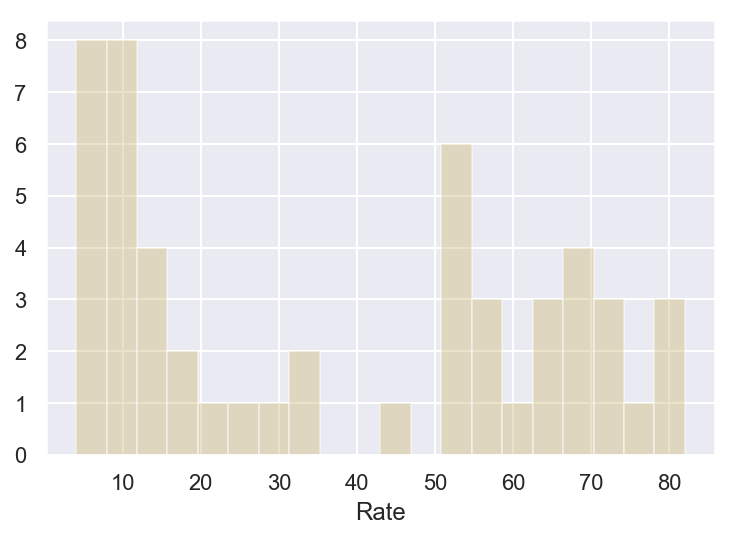

In [78]:
sns.distplot(satdfpd.Rate,kde=False, bins=20, color = 'y');

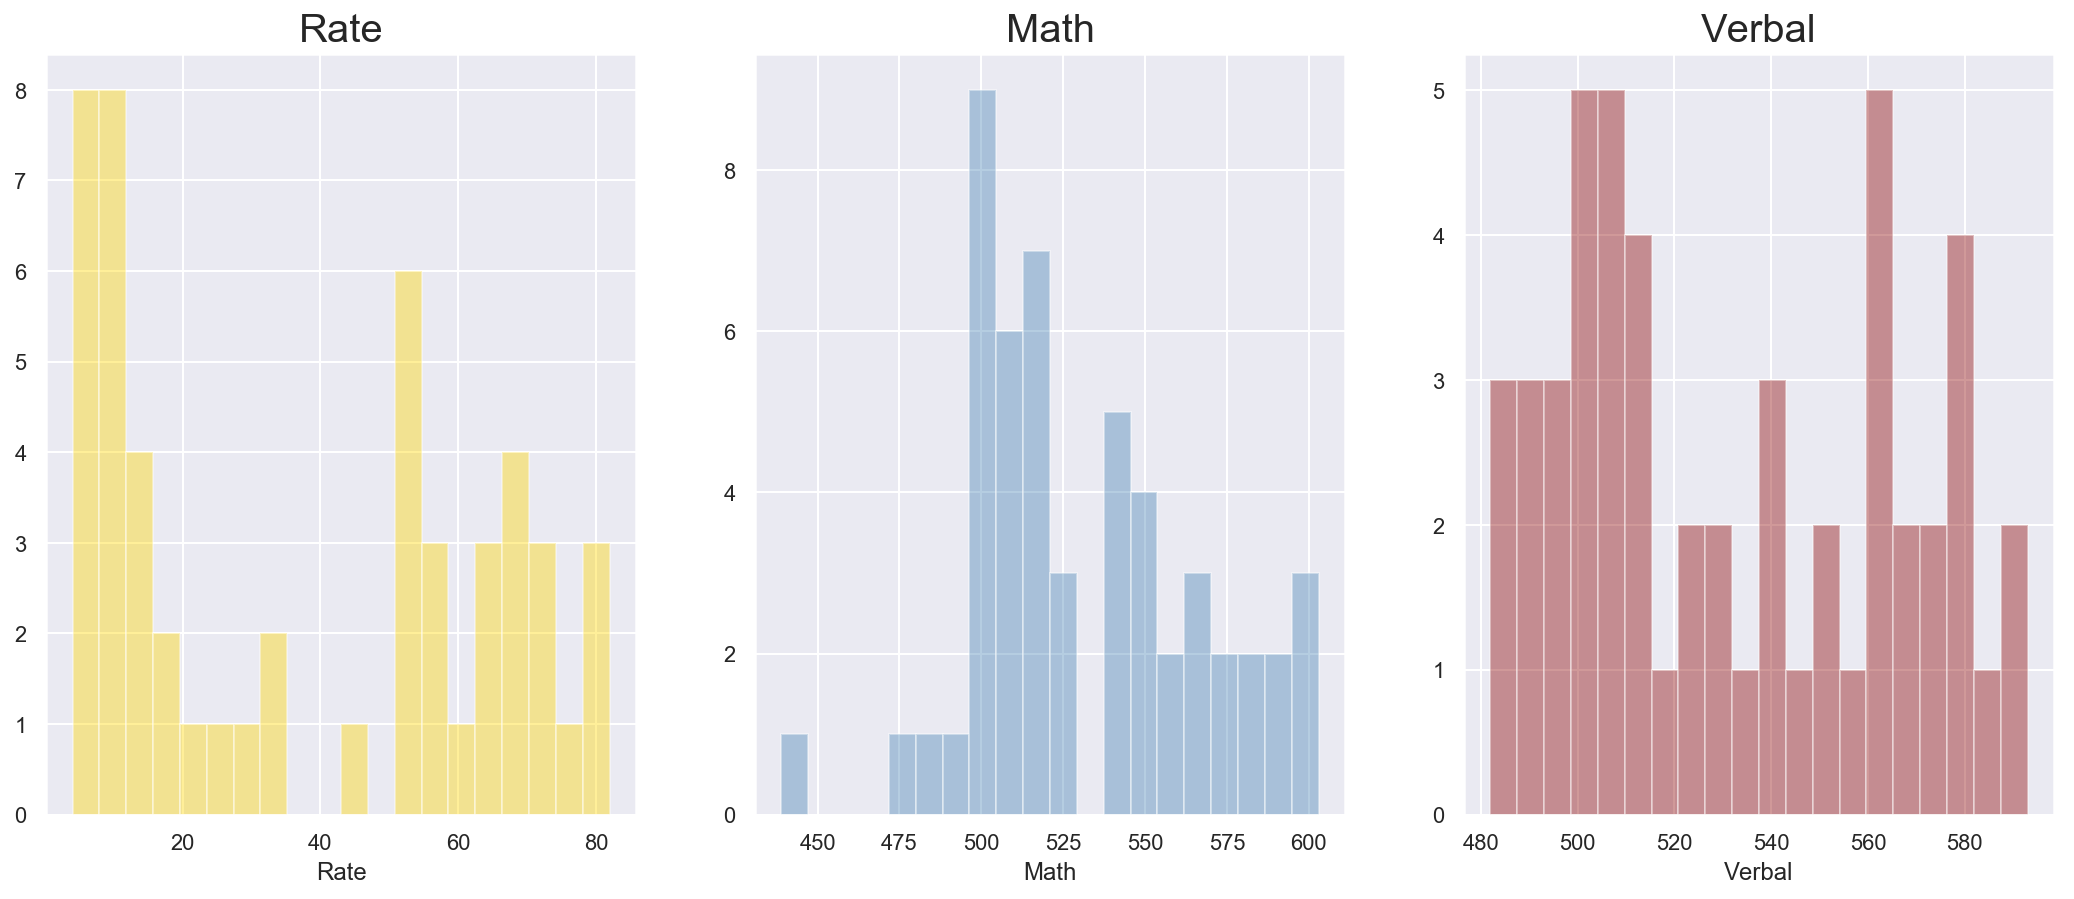

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(1, 3, figsize=(18,7))

axarr[0] = sns.distplot(satdfpd.Rate, kde=False, color='gold', ax=axarr[0], bins=20)
axarr[1] = sns.distplot(satdfpd.Math, kde=False, color='steelblue', ax=axarr[1], bins=20)
axarr[2] = sns.distplot(satdfpd.Verbal, kde=False, color='darkred', ax=axarr[2], bins=20)

axarr[0].set_title('Rate', fontsize=20)
axarr[1].set_title('Math', fontsize=20)
axarr[2].set_title('Verbal', fontsize=20)

plt.show()

### Stacked Verbal and Math Histograms for Analysis Comparison


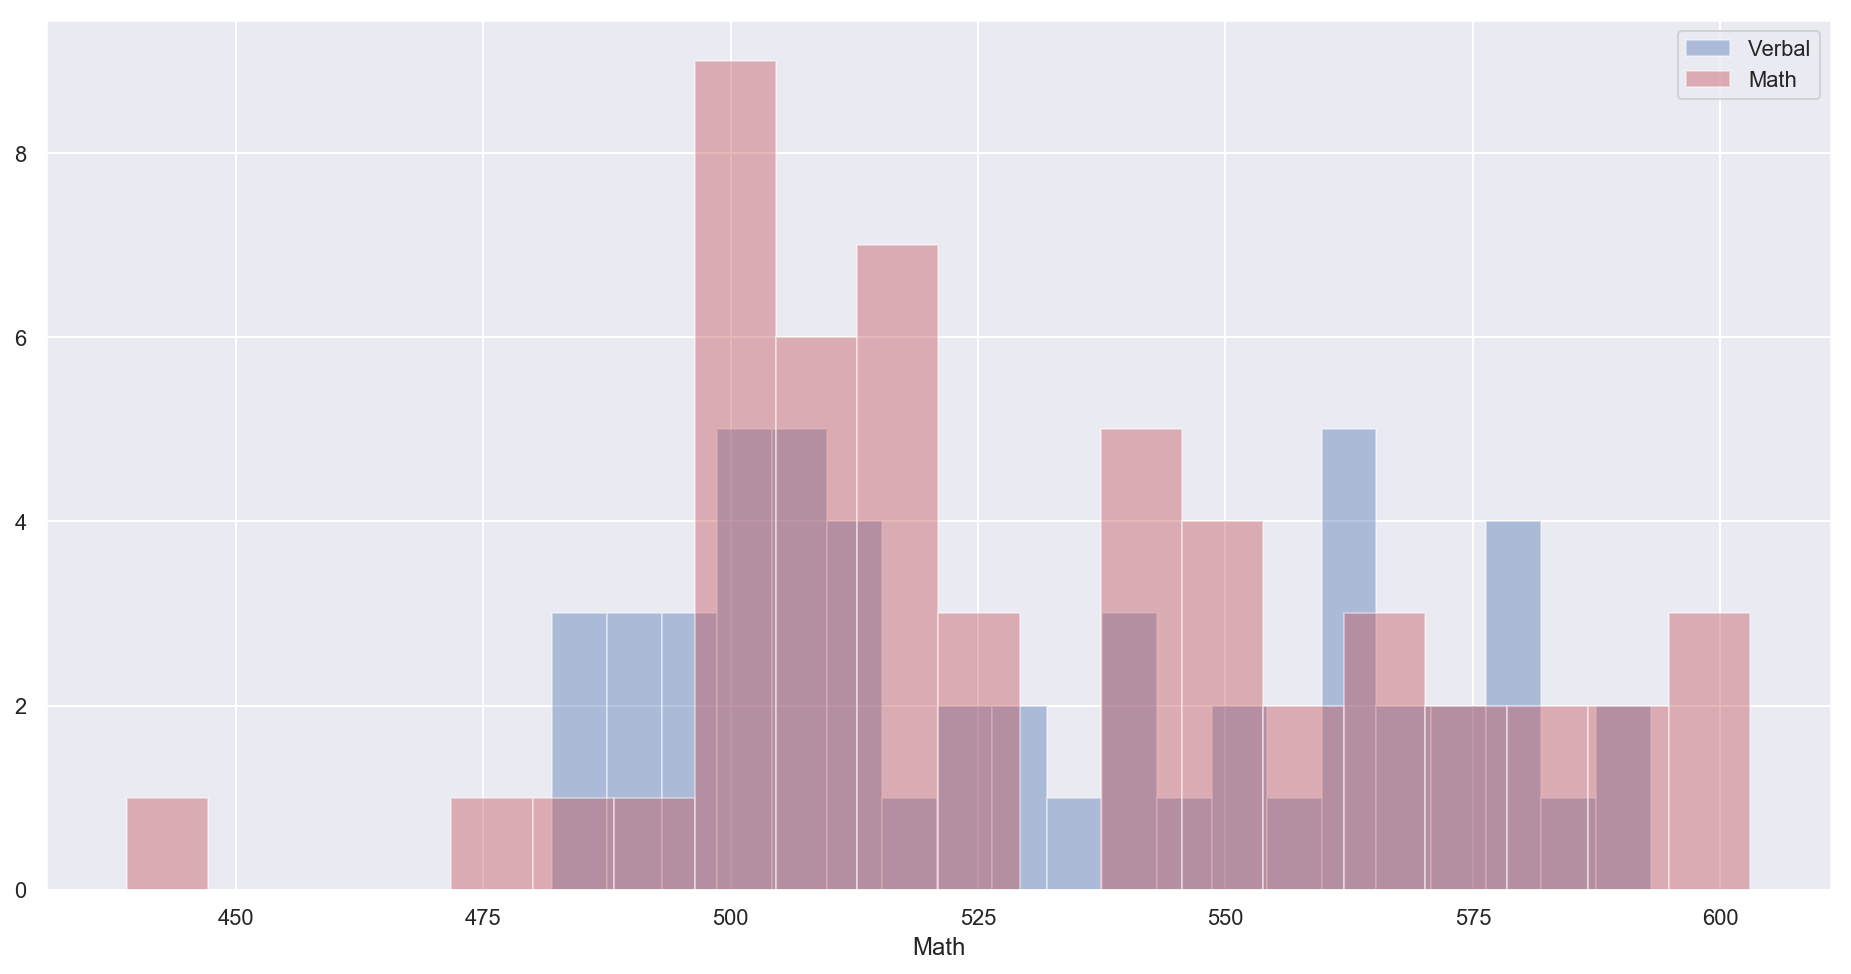

In [80]:
plt.figure(figsize=(16,8))
sns.distplot(satdfpd.Verbal,kde=False, bins=20, color ="b" ,label="Verbal")
sns.distplot(satdfpd.Math,kde=False, bins=20, color= "r", label = 'Math')

plt.legend()
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### Pair Plot distribution

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


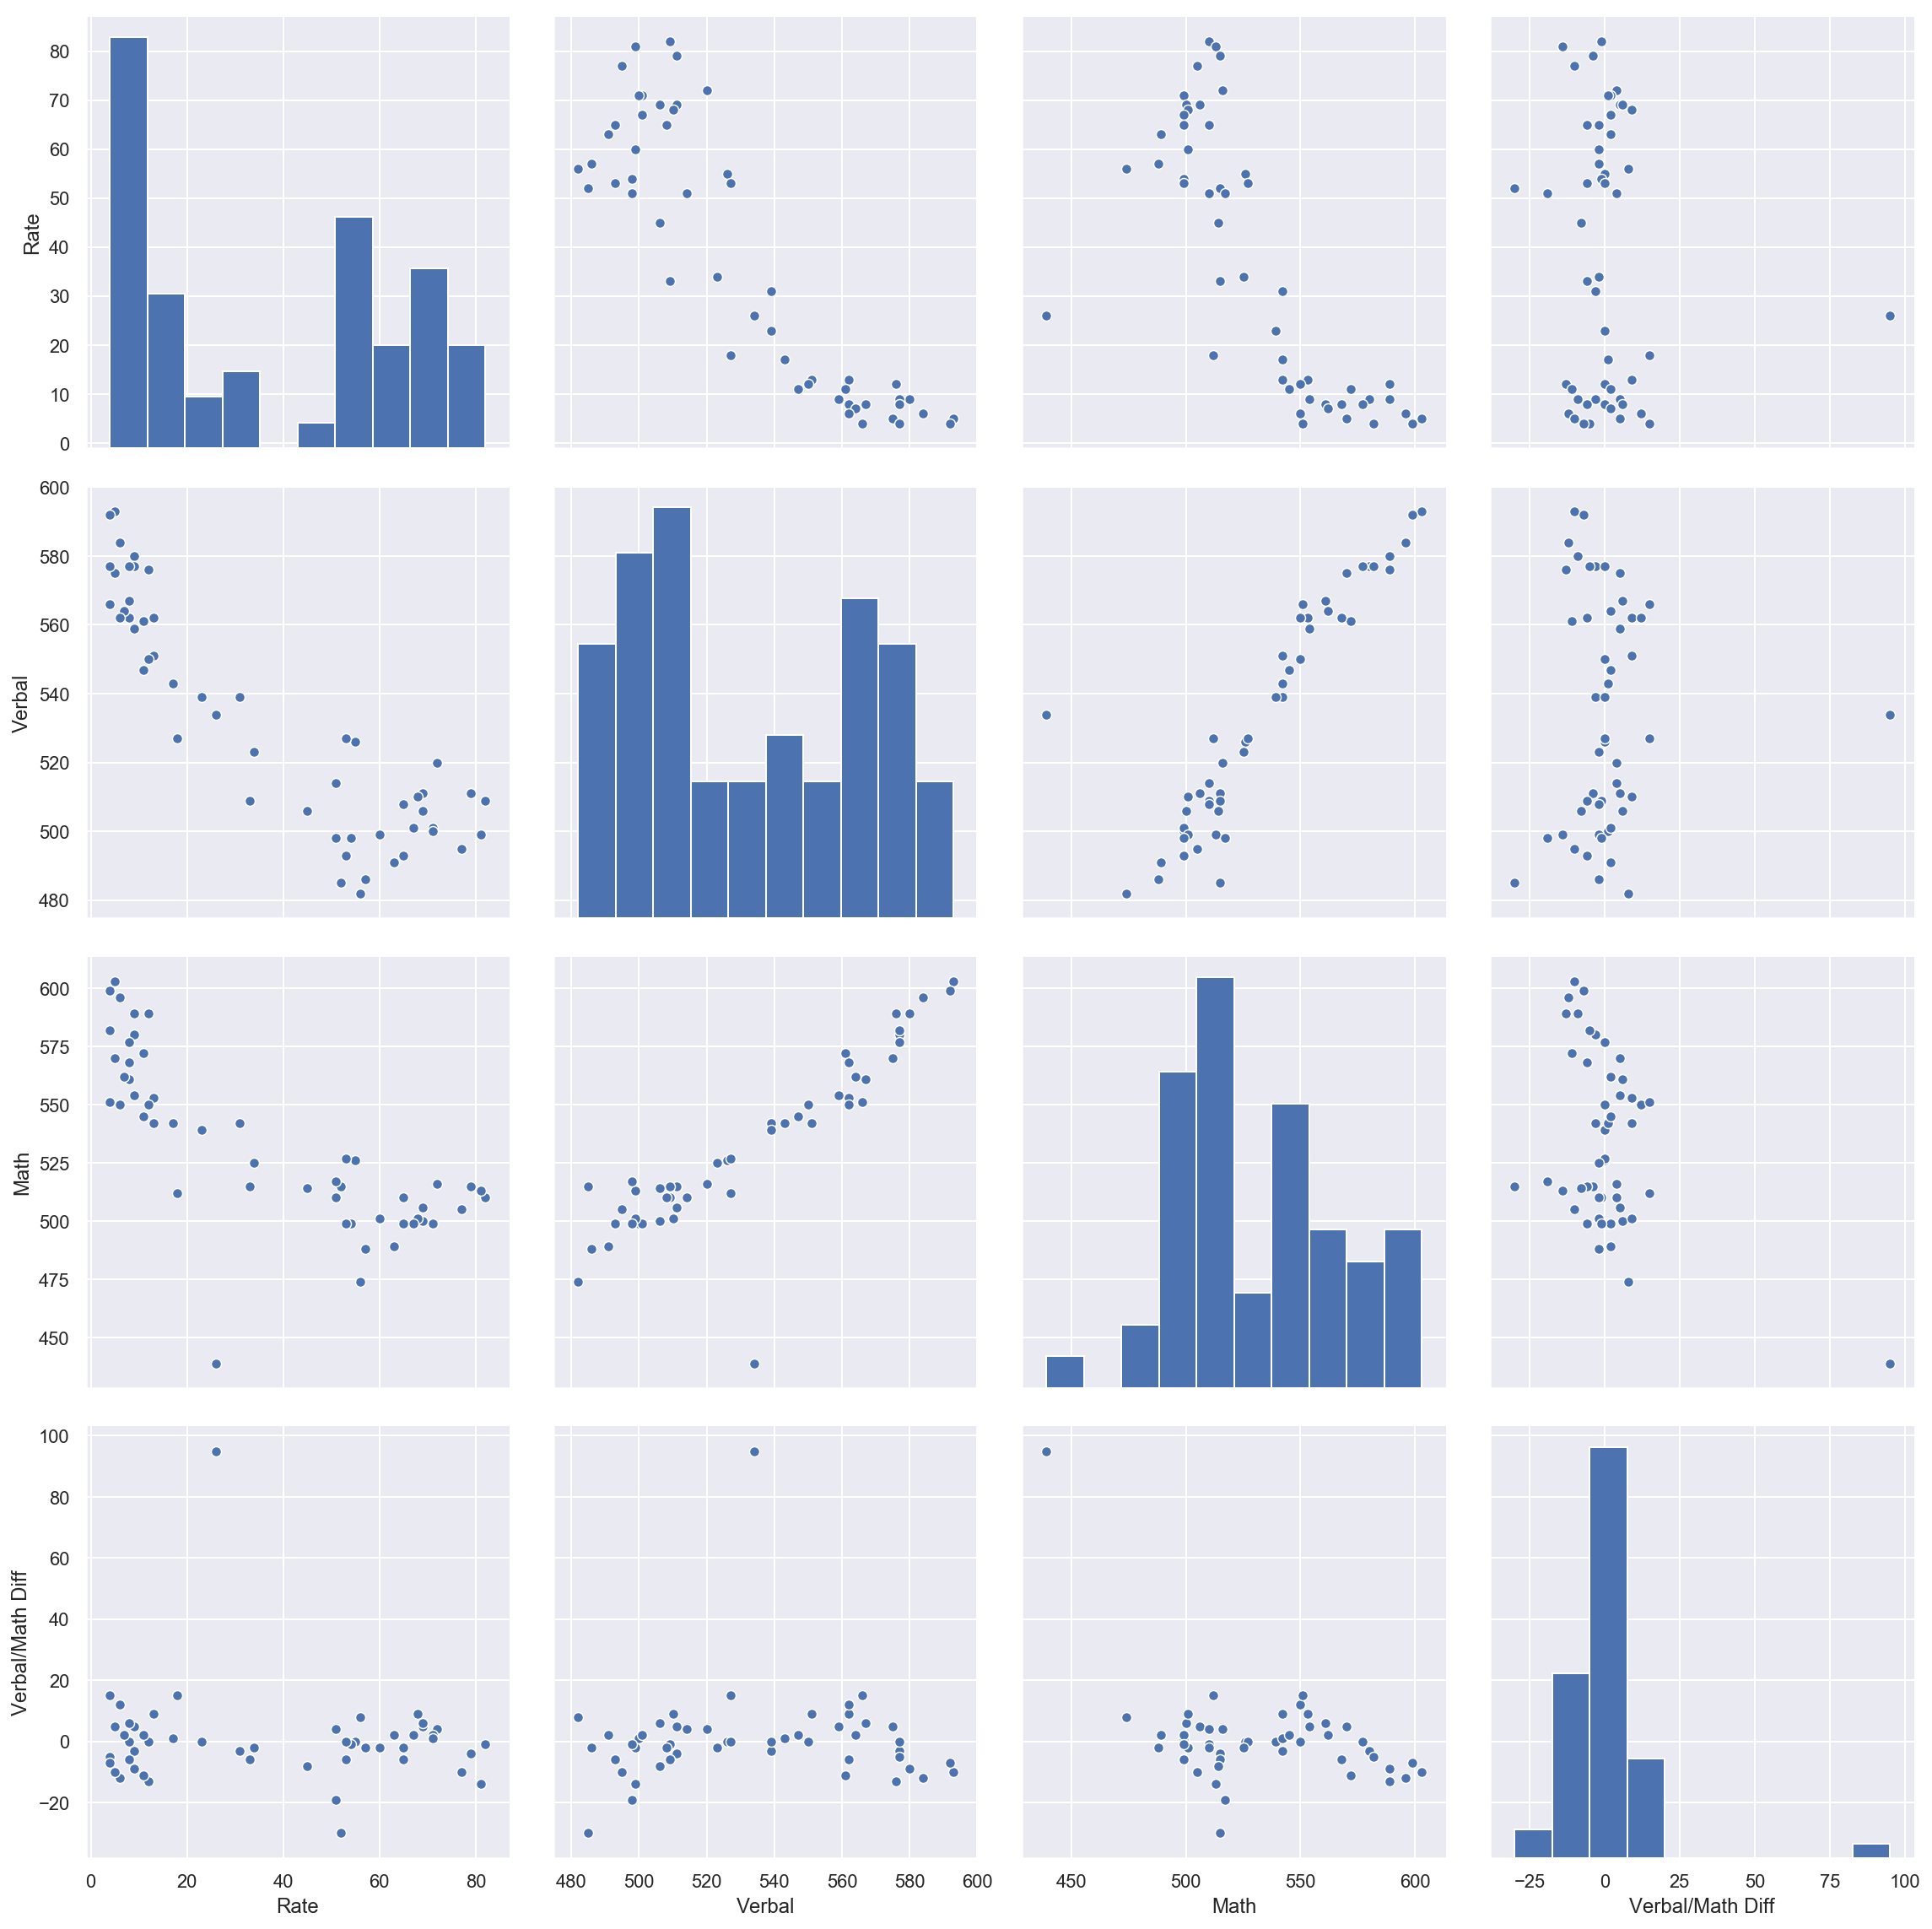

In [124]:
sns.pairplot(satdfpd, size =4);

## Visual Analysis

### Verbal and math are positively correlated.
### The "Rate" is negatively correlated to Math and verbal
### In a high rate, high math scores and high verbal scores are absent
### Here we see both the trend as well as the frequency shown the vertical lines

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

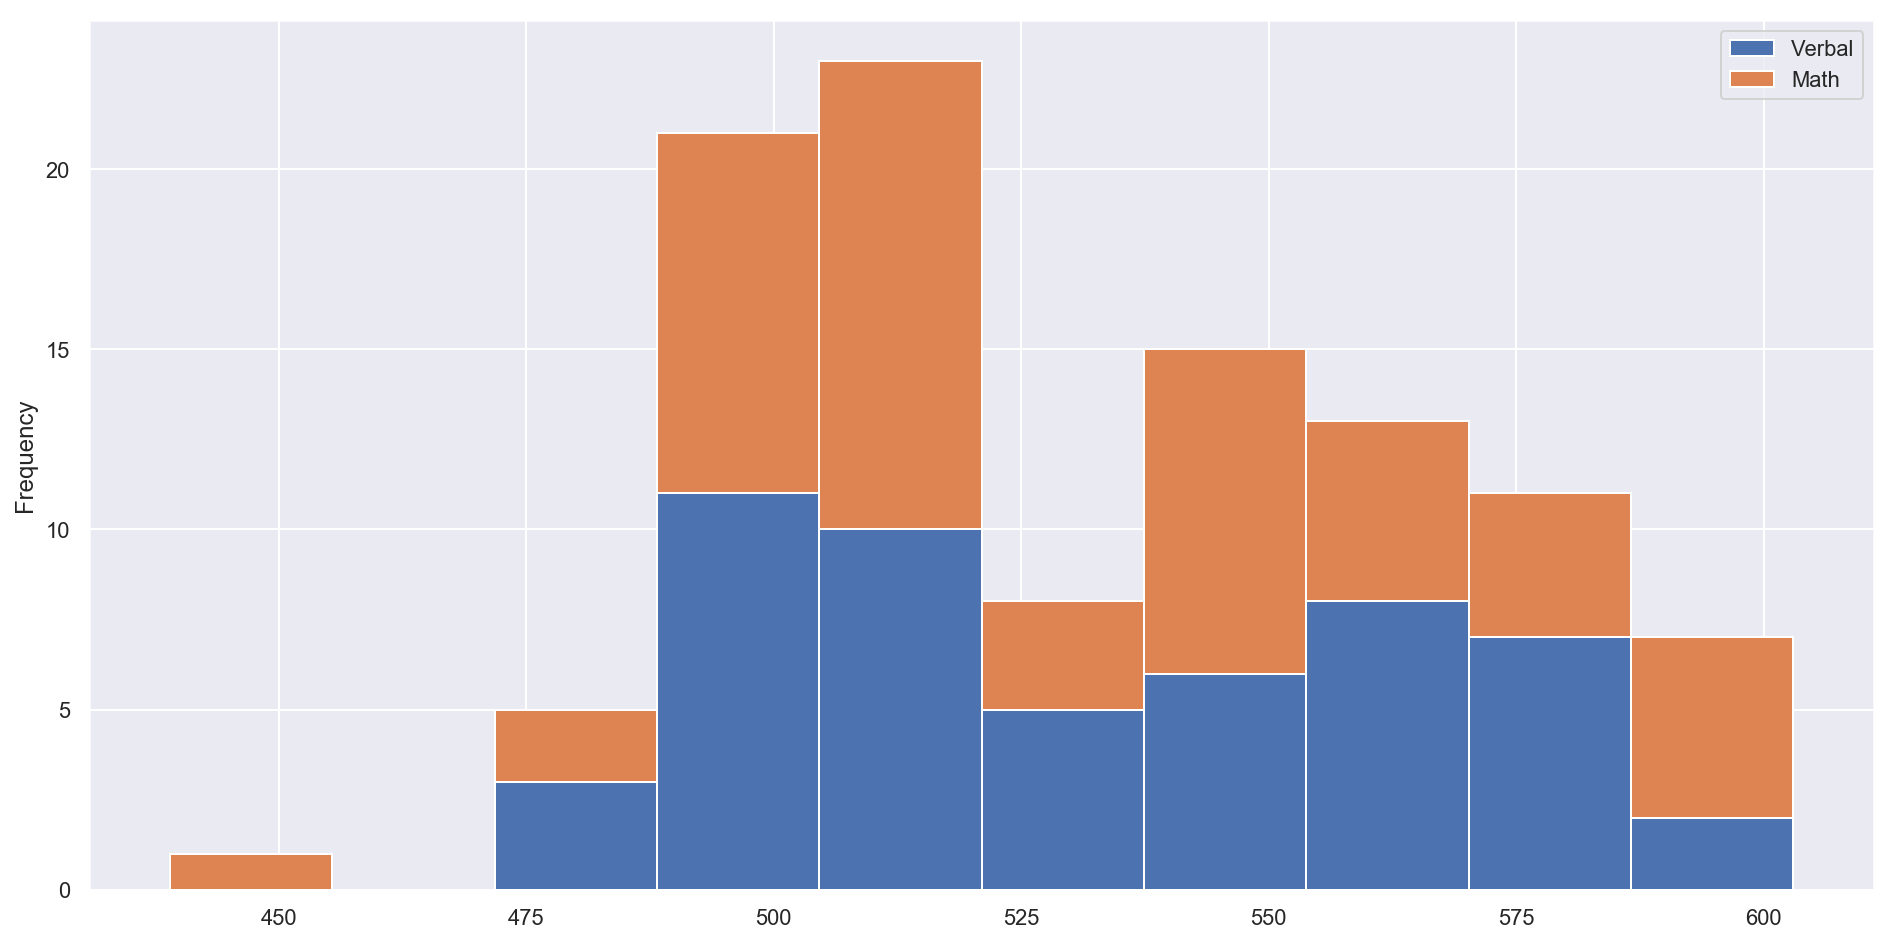

In [82]:

satdfpd[['Verbal','Math']].plot.hist(stacked=True, figsize=(16,8));

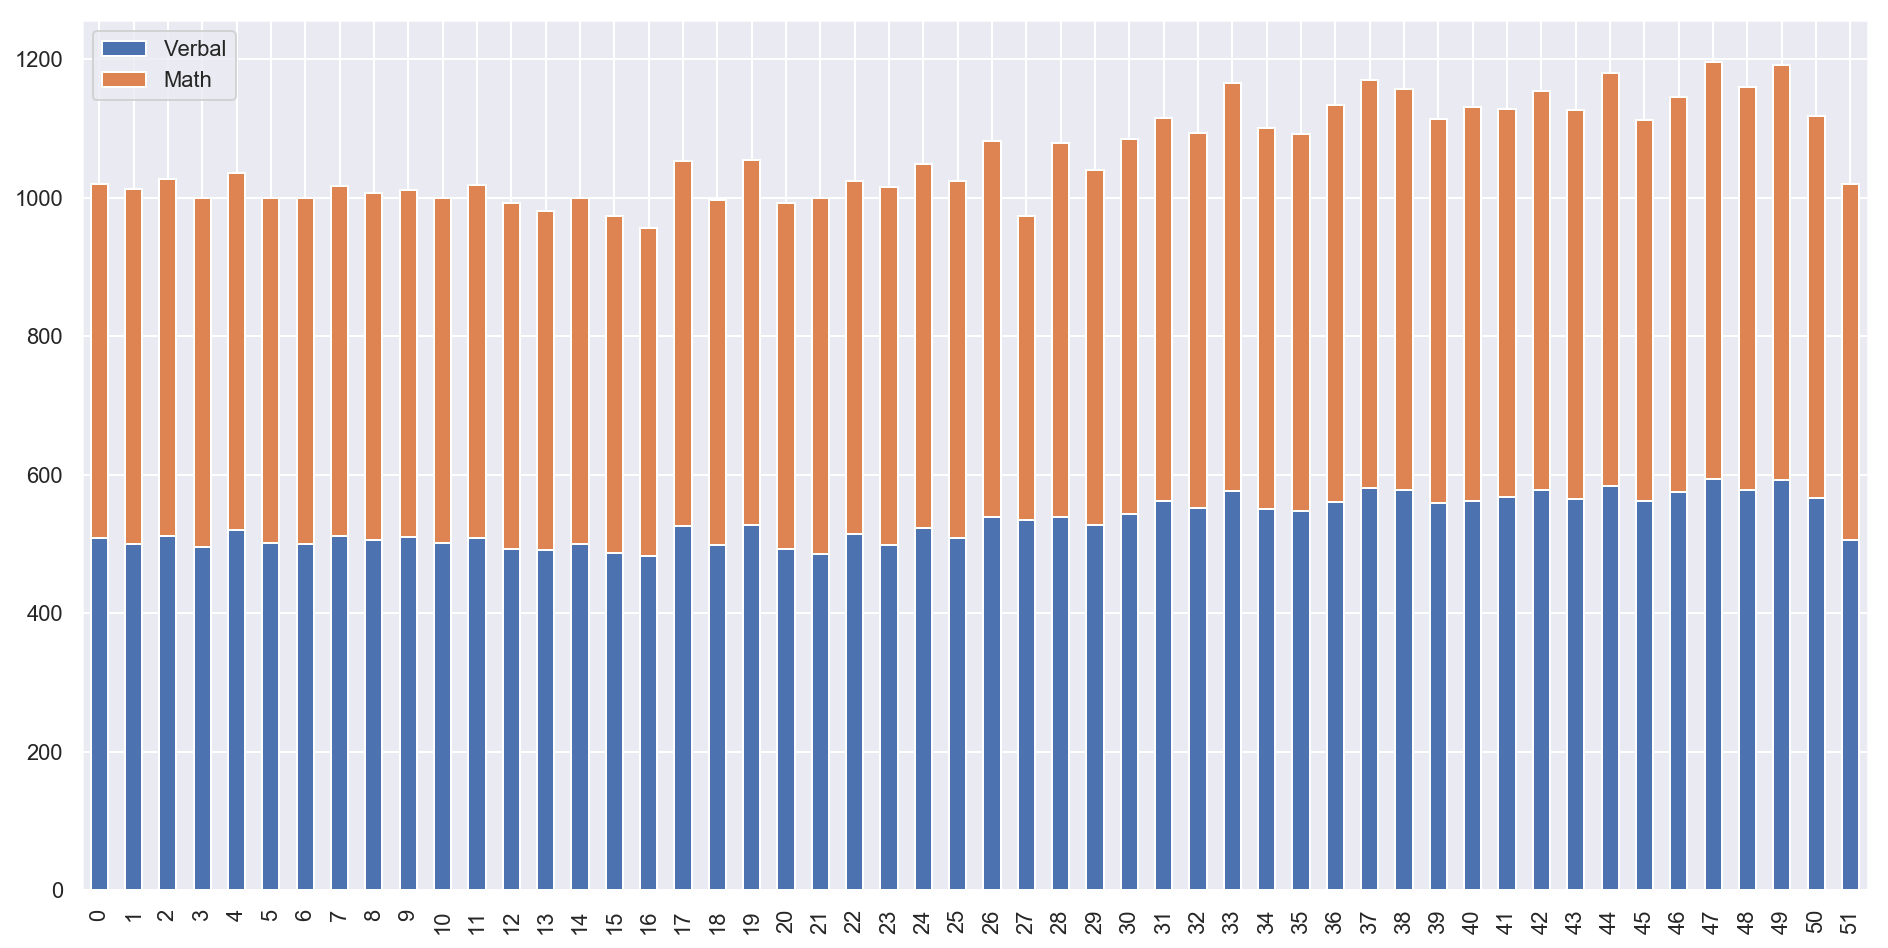

In [83]:
satdfpd[['Verbal','Math']].plot.bar(stacked=True, figsize=(16,8));

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

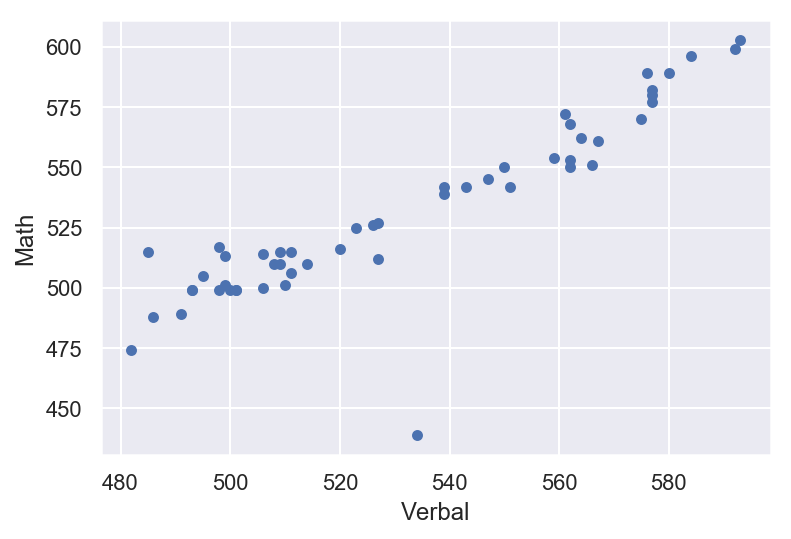

In [84]:

satdfpd.plot.scatter('Verbal', 'Math');

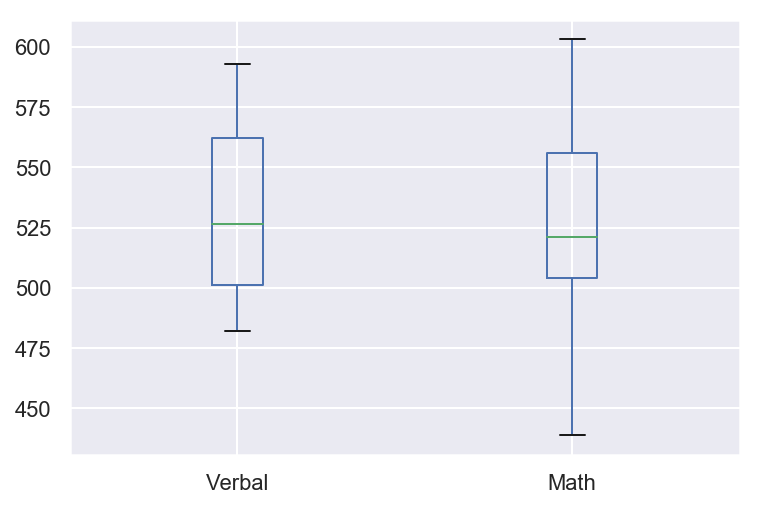

In [85]:
satdfpd.boxplot(column=['Verbal', 'Math']);

**** To make sense of the Chart we need to normalize the Variables, as Rate has a large Value hence making Math and Verbal off the Charts.  Hence to make the a reasonable comparison we need to make them in a similar scale.

A boxplot provides quantiles and outliers of a variable's distribution Boxplot directly compare side-by-side how these variables are distributed compared to each other, whereas Histogram and Scatter does not show that easily.

A scatterplot will show potential linear relationship between variables, how the variable's observations vary with each other.

Plotting rate on this chart is inappropriate because it is on a different scale as mentioned earlier.  Hence the normalization method below are needed to make a comparison.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [86]:
def normalize(column):
    mean = np.mean(column)
    std = np.std(column)
    newcolumn = []
    for data in column:
        newdata = (data - mean)/std
        newcolumn.append(newdata)
    return newcolumn

In [87]:
nMath = normalize(satdfpd['Math'])
nRate = normalize(satdfpd['Rate'])
nVerbal = normalize(satdfpd['Verbal'])

In [88]:
dfnorm = pd.DataFrame({'Math':nMath,'Rate':nRate,'Verbal':nVerbal,'State':satdfpd['State']})
dfnorm.head(3)

Math      Rate    Verbal State
0 -0.602798  1.658635 -0.699352    CT
1 -0.518687  1.621650 -1.003164    NJ
2 -0.462613  1.547680 -0.638589    MA

### Observe Range of Math, Rate and Verbal independently

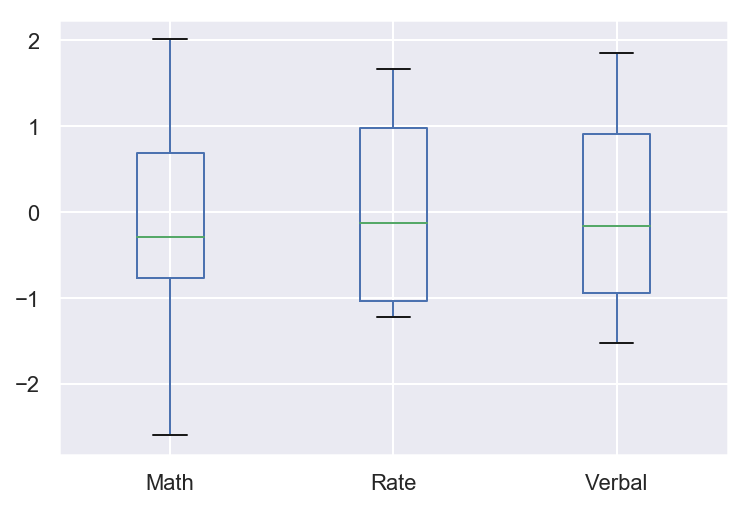

In [89]:
dfnorm.boxplot();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [90]:
vmean = satdfpd.loc [satdfpd['Verbal'] > np.mean(satdfpd['Verbal']), 'State']
print (vmean)
print (vmean.count())

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
24


24 States scored above the mean, indicating that almost half of the entire
population are above the mean and doesn't look like it's skewed on either sides.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [91]:
vmedian = satdfpd.loc [satdfpd['Verbal'] > np.median(satdfpd['Verbal']), 'State']
print (vmedian)
print (vmedian.count())

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26


### Higher in both Median and Mean

In [92]:
def AND(column1,column2):
    newcolumn = []
    for element in column1.keys():
        if element in column2.keys():
            newcolumn.append(column1[element])
    return newcolumn

In [93]:
vmean.keys()

Int64Index([26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45, 46, 47, 48, 49, 50],
           dtype='int64')

### Median has 2 or More

In [94]:
print (AND(vmedian,vmean))
print (len(AND(vmedian,vmean)))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24


### Difference

In [95]:
def NOT(column1,column2):
    newcolumn = []
    for element in column1.keys():
        if element not in column2.keys():
            newcolumn.append(column1[element])
    return newcolumn

In [96]:
print (NOT(vmedian,vmean))

['WA', 'WV']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [97]:
satdfpd['Verbal/Math Diff'] = satdfpd['Verbal'] - satdfpd['Math']

In [98]:
satdfpd.head()

State  Rate  Verbal  Math  Verbal/Math Diff
0    CT    82     509   510                -1
1    NJ    81     499   513               -14
2    MA    79     511   515                -4
3    NY    77     495   505               -10
4    NH    72     520   516                 4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

### Low Math - High Verbal

In [99]:
gap = satdfpd.loc[:,['State','Verbal','Math','Rate','Verbal/Math Diff']].sort_values('Verbal/Math Diff', ascending=False).head(10)
gap.reset_index(inplace=True)
gap.drop('index', axis=1, errors='ignore',  inplace = True)
gap.head(3)

State  Verbal  Math  Rate  Verbal/Math Diff
0    OH     534   439    26                95
1    MS     566   551     4                15
2    WV     527   512    18                15

### High Math - Low Verbal

In [100]:
hgap = satdfpd.loc[:,['State','Verbal','Math','Rate','Verbal/Math Diff']].sort_values('Verbal/Math Diff',ascending=True).head(10)
hgap.reset_index(inplace=True)
hgap.drop('index', axis=1, errors='ignore',  inplace = True)
hgap.head(3)

State  Verbal  Math  Rate  Verbal/Math Diff
0    HI     485   515    52               -30
1    CA     498   517    51               -19
2    NJ     499   513    81               -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [101]:
hgap.corr()

Verbal      Math      Rate  Verbal/Math Diff
Verbal            1.000000  0.990605 -0.919146          0.502806
Math              0.990605  1.000000 -0.936380          0.379873
Rate             -0.919146 -0.936380  1.000000         -0.298640
Verbal/Math Diff  0.502806  0.379873 -0.298640          1.000000

In [102]:
gap.corr()

Verbal      Math      Rate  Verbal/Math Diff
Verbal            1.000000  0.739411 -0.890756          0.002363
Math              0.739411  1.000000 -0.602454         -0.671505
Rate             -0.890756 -0.602454  1.000000         -0.085551
Verbal/Math Diff  0.002363 -0.671505 -0.085551          1.000000

In [103]:
satdfpd.corr()

Rate    Verbal      Math  Verbal/Math Diff
Rate              1.000000 -0.886432 -0.773746         -0.101412
Verbal           -0.886432  1.000000  0.899871          0.052600
Math             -0.773746  0.899871  1.000000         -0.388219
Verbal/Math Diff -0.101412  0.052600 -0.388219          1.000000

When math is good, verbal is good too.
when verbal is good, math may not be just as good
A participation rate correlates with a high mathematical score when math is better than verbal
when math is worse than verbal, a high math may not correlate with a high participation rate.

Probably better to describe the correlation Via Pair Plot to see any correlation.

From what we can see there's seems to be an outliner that's a little off the chart, hence outliners are easier to identify if it was visualised.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


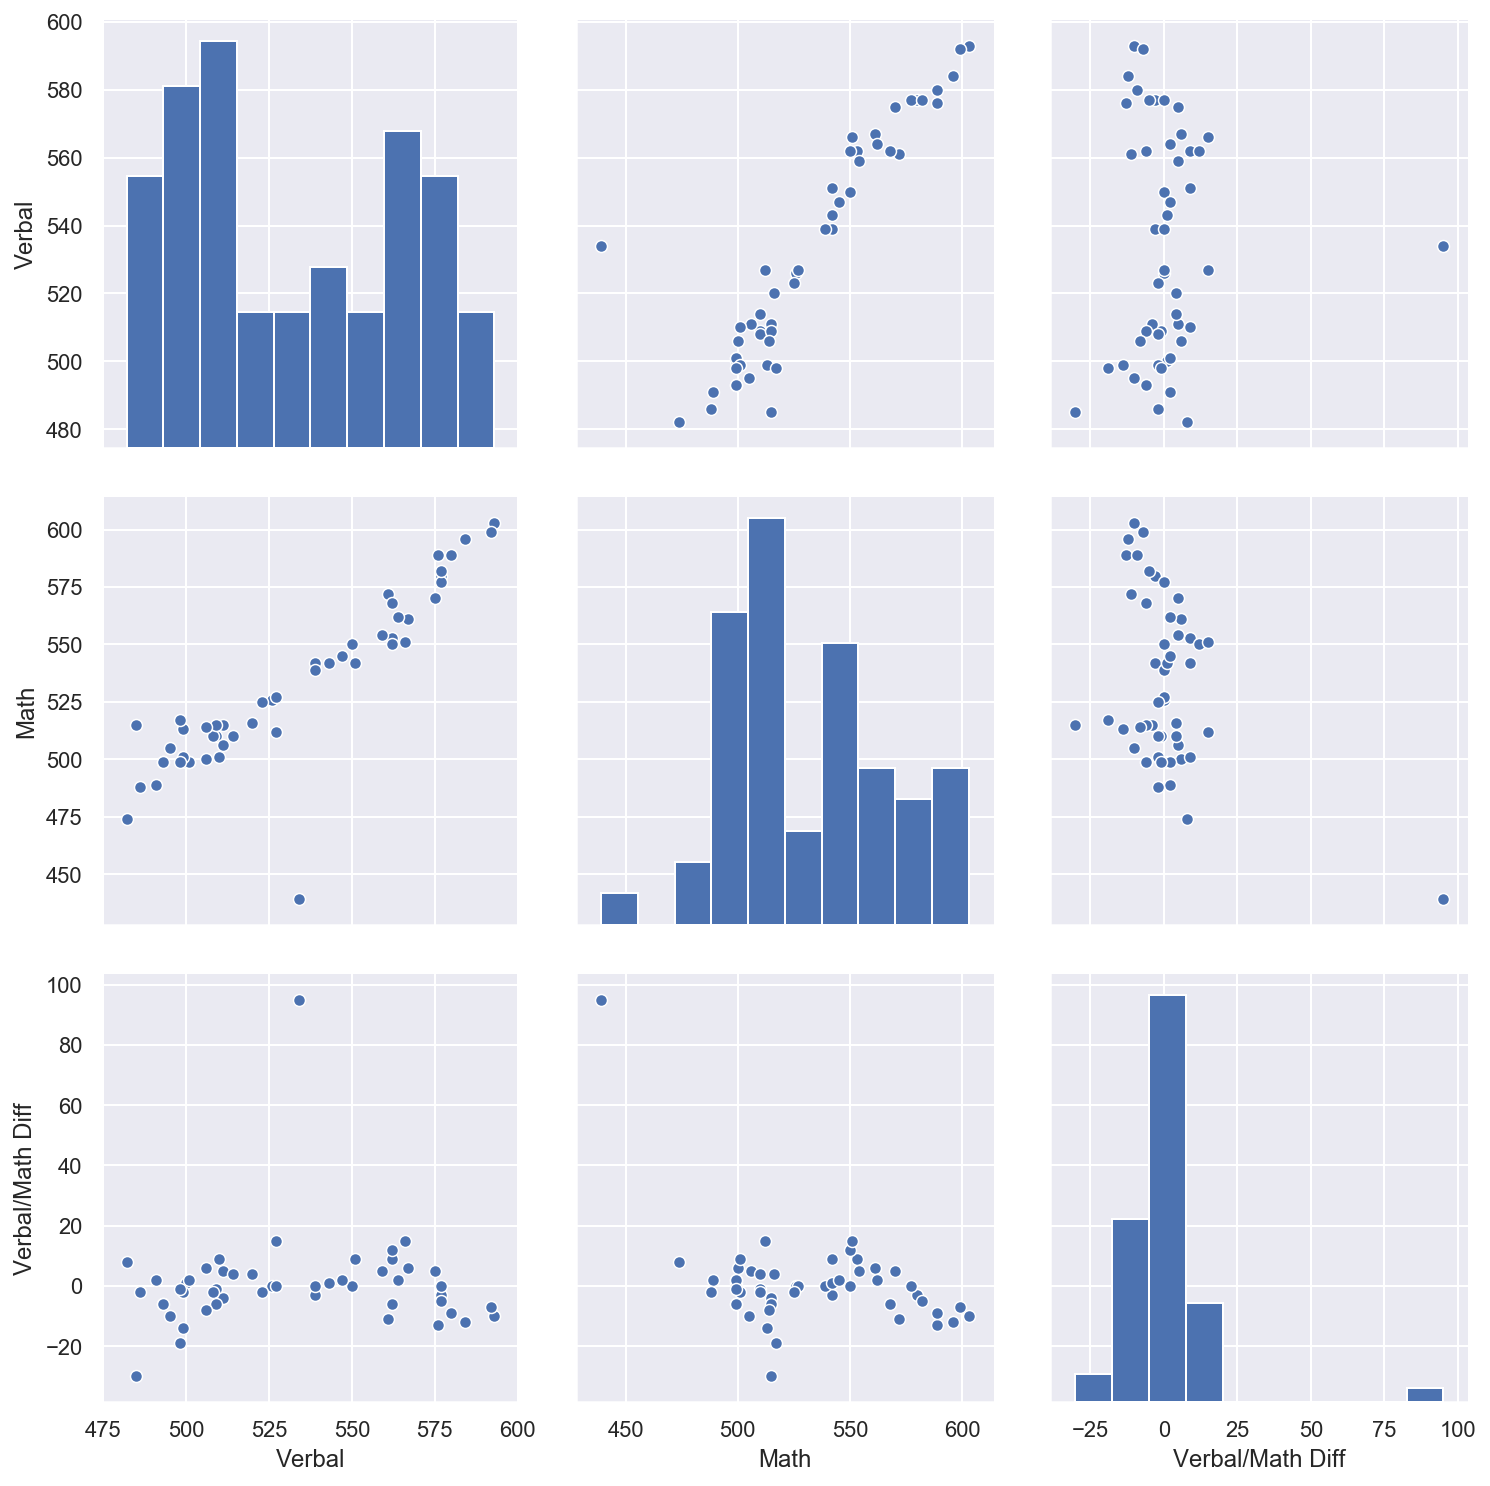

In [104]:
sns.pairplot(satdfpd[['Verbal','Math','Verbal/Math Diff']],size=3.5);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [105]:
satdfpd.describe()

Rate      Verbal        Math  Verbal/Math Diff
count  52.000000   52.000000   52.000000         52.000000
mean   37.153846  532.019231  531.500000          0.519231
std    27.301788   33.236225   36.014975         15.729939
min     4.000000  482.000000  439.000000        -30.000000
25%     9.000000  501.000000  504.000000         -6.000000
50%    33.500000  526.500000  521.000000          0.000000
75%    63.500000  562.000000  555.750000          4.250000
max    82.000000  593.000000  603.000000         95.000000

1. count = how many data points we have for that column
2. mean = the average of that column
3. std = the standard deviation, or the "variability" of that column, higher 4. 4. means more sparse
5. min = the minimum vaue within that column
6. percentile --> What percent of the population has at least this value
7. 25%, the 25th percentile. 25% of the values in the column has at at least   this value. Same for 50, 75.
8. max = the highest value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [106]:
SAT_Covariance = satdfpd.cov()
SAT_Covariance

Rate       Verbal         Math  Verbal/Math Diff
Rate              745.387632  -804.355958  -760.803922        -43.552036
Verbal           -804.355958  1104.646682  1077.147059         27.499623
Math             -760.803922  1077.147059  1297.078431       -219.931373
Verbal/Math Diff  -43.552036    27.499623  -219.931373        247.430995

Covariance measures the degree to which two variables are linearly associated. how changes in one variable are associated with changes in a second variable. Correlation is the result of normalizing the covariance into a range from -1 to 1, referring to on average, per 1 unit. covariance tries to look into and measure how much variables change together whereas correlation is a linear relationship of how changes in one variable changes the other variable scaled proportionately, a corr of 1 means variable one increase from 2 to 4 would result in variable 2 increase from 16 to 32.

Convert covariance to correlation by dividing covariance by the standard deviations of the variables or just use the formula

Correlation matrix is preferred because it is normalized between -1 to 1 and therefore makes sense regardless of the scale of the variables are as different numbers mean different things between different covariances and that might be confusing. With correlation, all variables are normed and one does not need to understand the scale of each variable to understand the value of the correlation, simply looking at the correlation number is enough for inference.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [107]:
drugdf = pd.read_csv(drugfile)
drugdf.head(5)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [108]:
drugdf.shape

(17, 28)

In [109]:
print (drugdf.isnull().sum())
print (drugdf.dtypes)

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64
age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64


NULL present but not concerning, however some values are objects and we need to convert to float.

df.info() will show non-null per column however it does not shows any objects within the column since the majority are intergers.

In [126]:
satdfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State               52 non-null object
Rate                52 non-null int64
Verbal              52 non-null int64
Math                52 non-null int64
Verbal/Math Diff    52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [125]:
import re
number = '(^[*0-9]*)'

Create Function to clean the columns and convert to float

In [111]:
def intonumeric(column,df=drugdf):
    
    nonsense = '[^0-9]'
    #This takes the maximum value if its a range
    try:
        #this finds the nonsense
        mask = df[column].apply(lambda x: bool(re.match(nonsense,x)))
         #this changes makes the nonsense into nan
        df.loc[mask,column] = np.nan
    except:
        pass
    
    
    #this changes object into numeric
    df[column]= pd.to_numeric(df[column], errors='ignore')

In [112]:
dirty =[clean[0] for clean in drugdf.dtypes.iteritems() if clean[1] =='object']
dirty.pop(0) #cleans the age out as we will process that differently

'age'

In [113]:
dirty

['cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

Clean Dirty Columns

In [114]:
for filth in dirty:
    intonumeric(filth)
try:
    drugdf['age'] = [element[0] for element in drugdf['age'].apply(lambda x: (re.findall(number,x)) )]
    drugdf['age']= pd.to_numeric(drugdf['age'], errors='ignore')
except:
    pass


In [115]:
print (drugdf.dtypes)
drugdf.head(5)

age                          int64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object


age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12  2798          3.9                3.0            1.1   
1   13  2757          8.5                6.0            3.4   
2   14  2792         18.1                5.0            8.7   
3   15  2956         29.2                6.0           14.5   
4   16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              NaN         ...                    0.1                 24.5   
1              3.0         ...                    0.1                 41.0   
2              NaN         ...                    0.4                  4.5   
3              9.5         ...                    0.8                  3.0   
4              1.0         ...                    1.1                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             NaN           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   
3                  6.0       0.3            10.5           0.4   
4                  9.5       0.3            36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 28 columns]

In [116]:
drugdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null int64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyconti

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

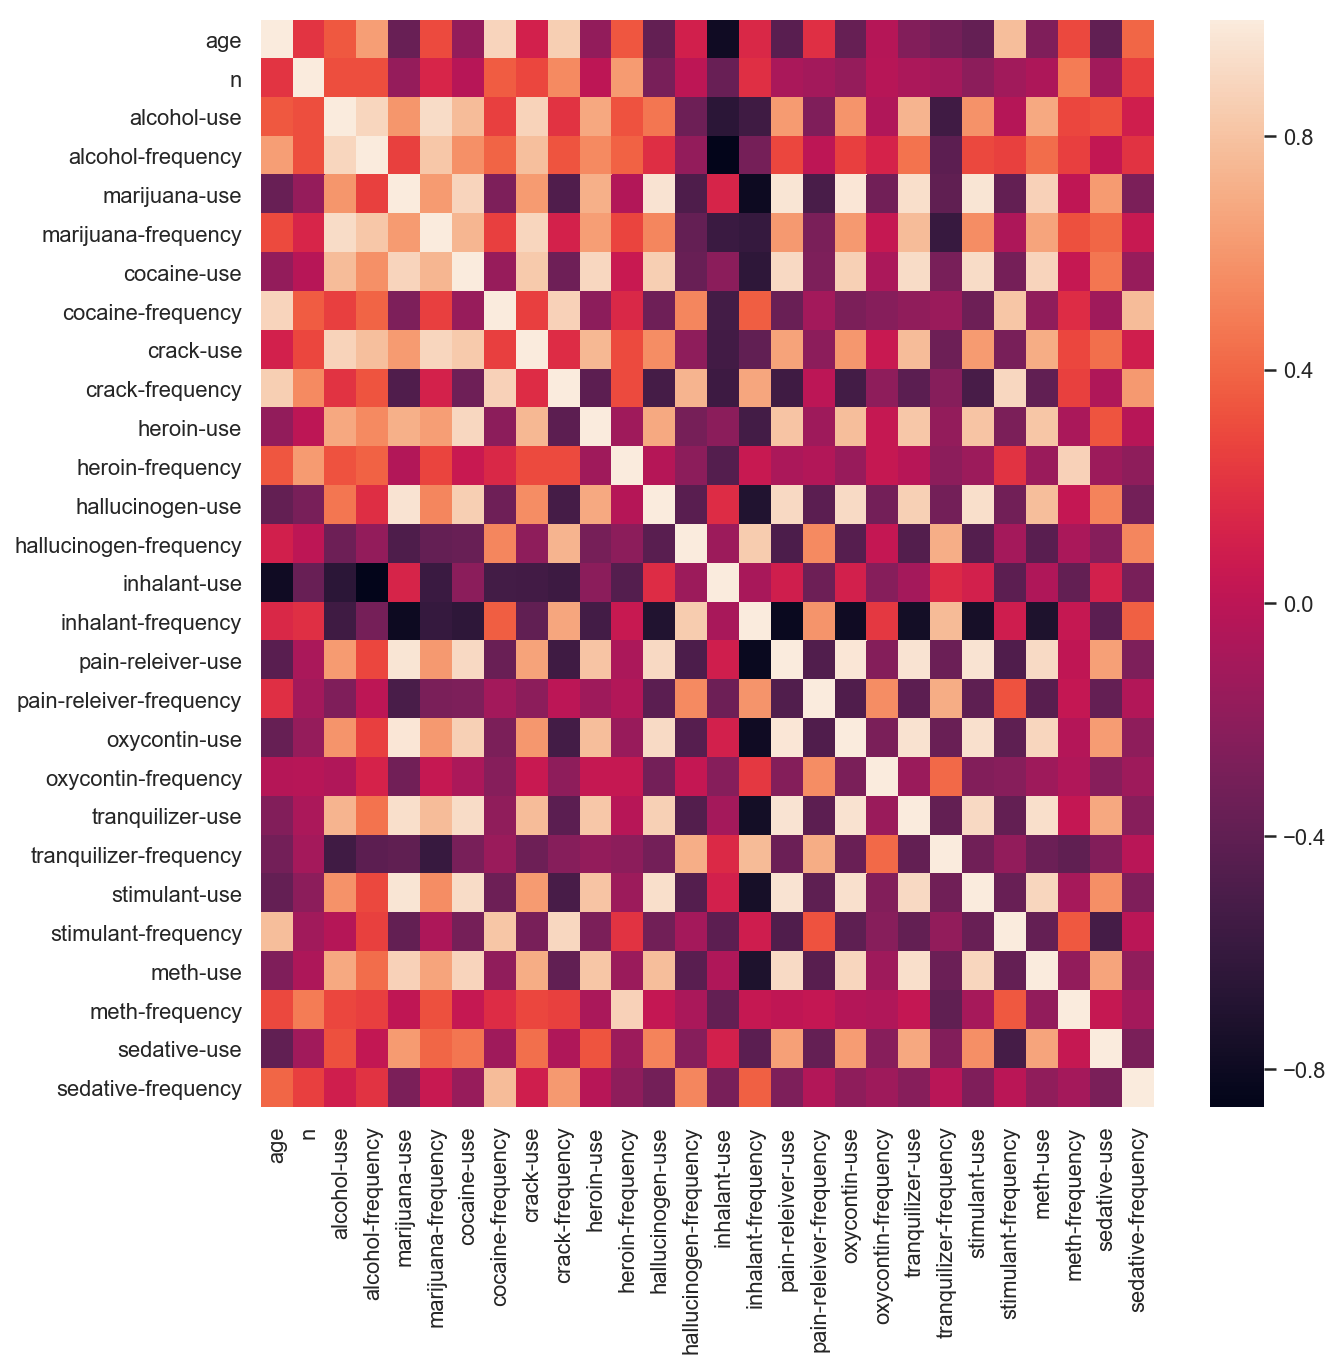

In [146]:
sns.heatmap(drugdf.corr())
plt.rcParams['figure.figsize']=(30,30)

### We observe some extreme values for inverse correlations and correlations for inhalant frequency


Get the list of uses and frequencies and plot the trend for these against age


In [147]:
use = [use for use in drugdf.columns[2::2] ]
frequencies = [ frequency for frequency in drugdf.columns[1::2]]
frequencies.pop(0)

'n'

### Trend of Use over age

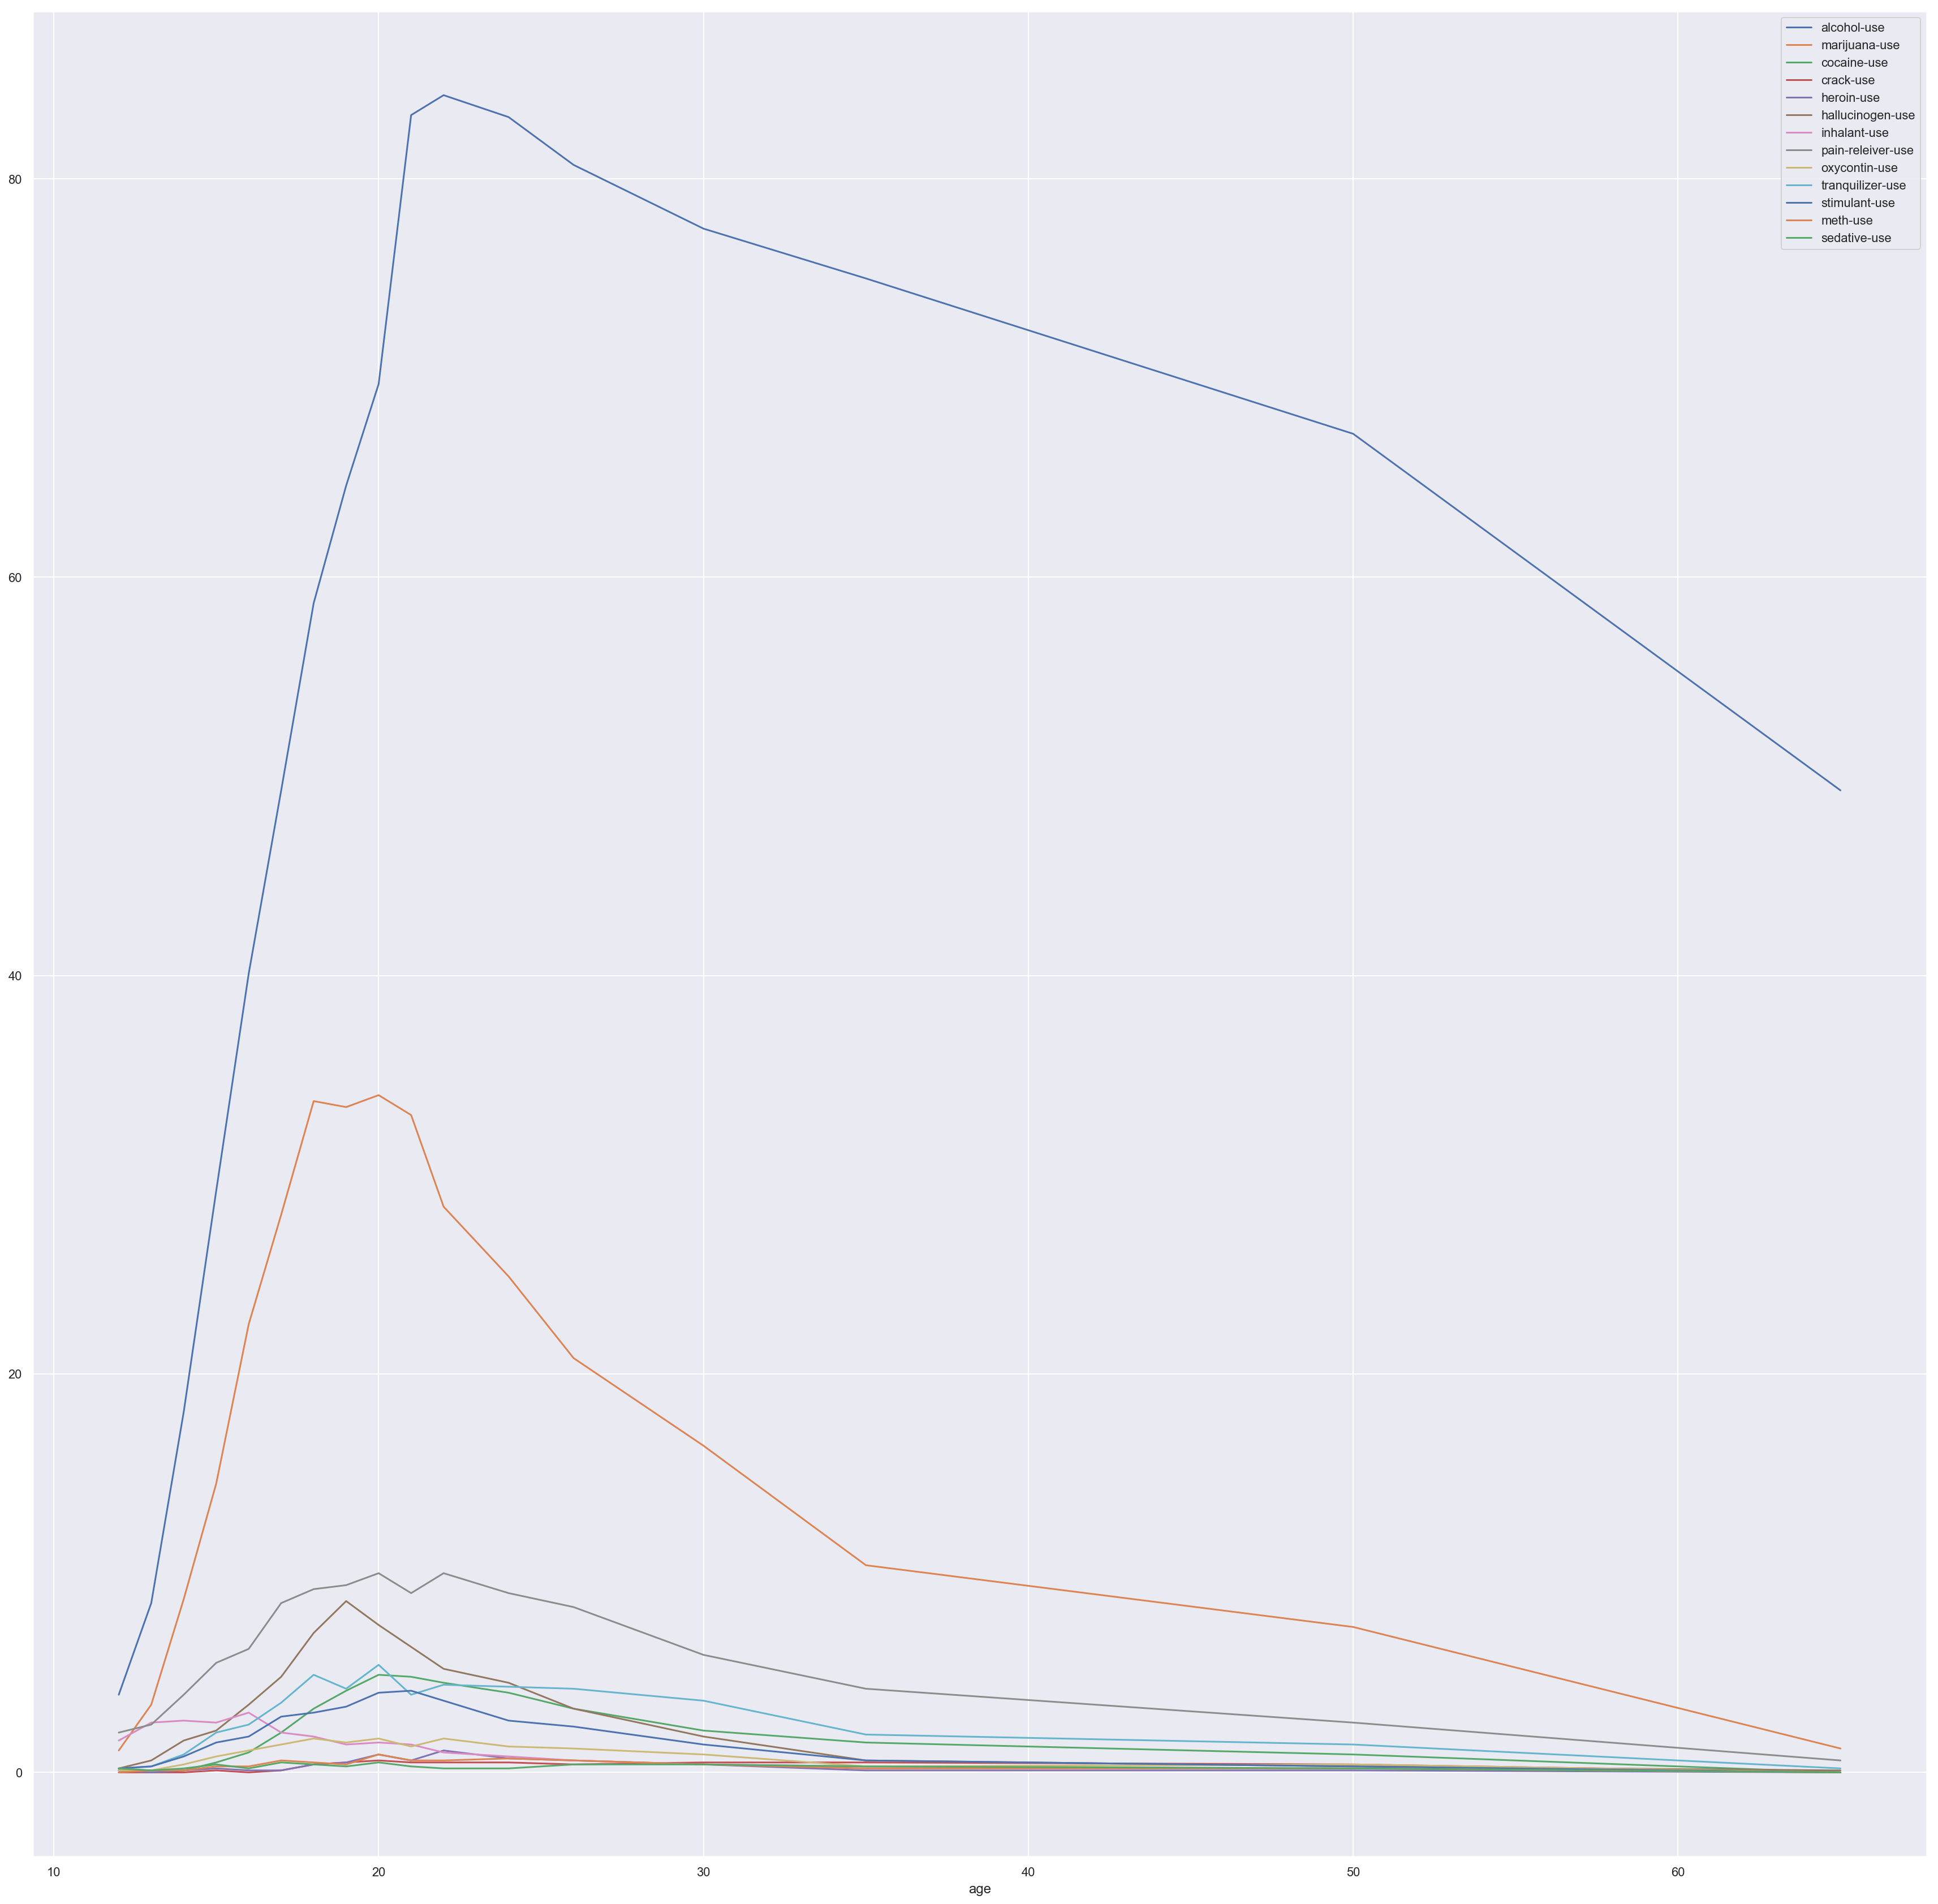

In [154]:
drugdf.plot.line(x='age', y=use);

### Remove Alcohol and Marijuana

In [151]:
ExcMA = use[:]
ExcMA.remove('marijuana-use')
ExcMA.remove('alcohol-use')

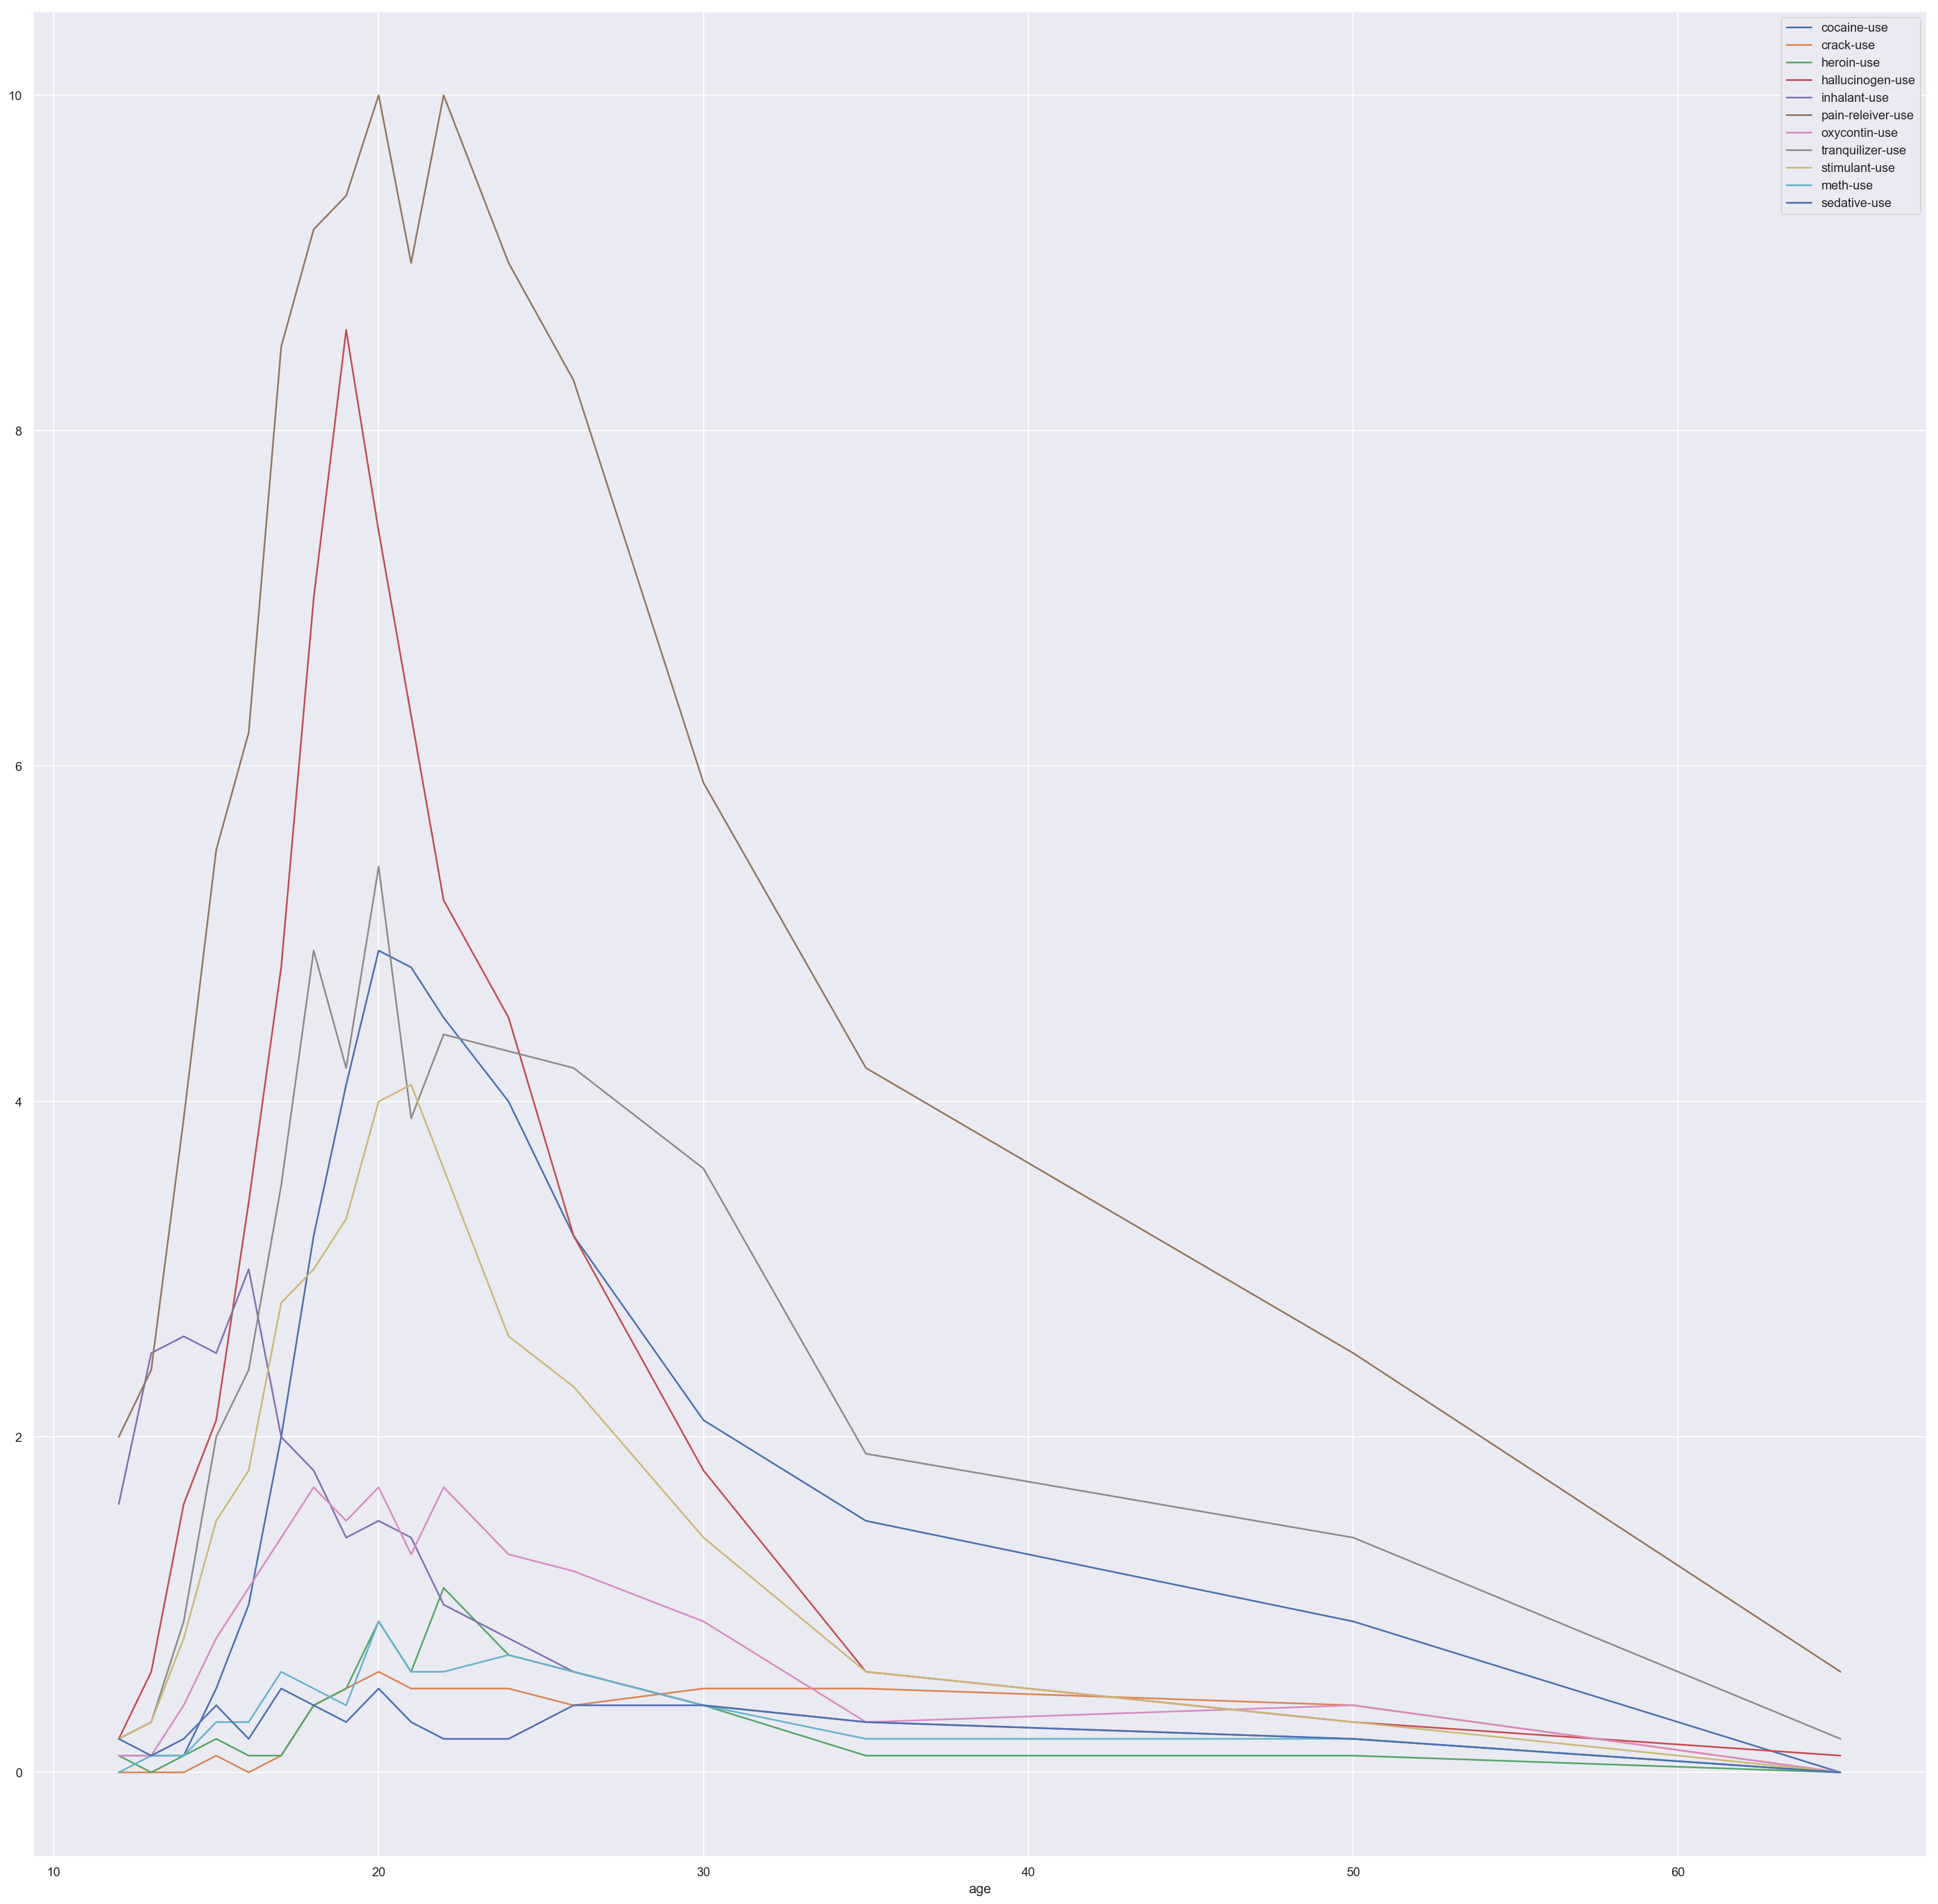

In [153]:
drugdf.plot.line(x='age',y=ExcMA);

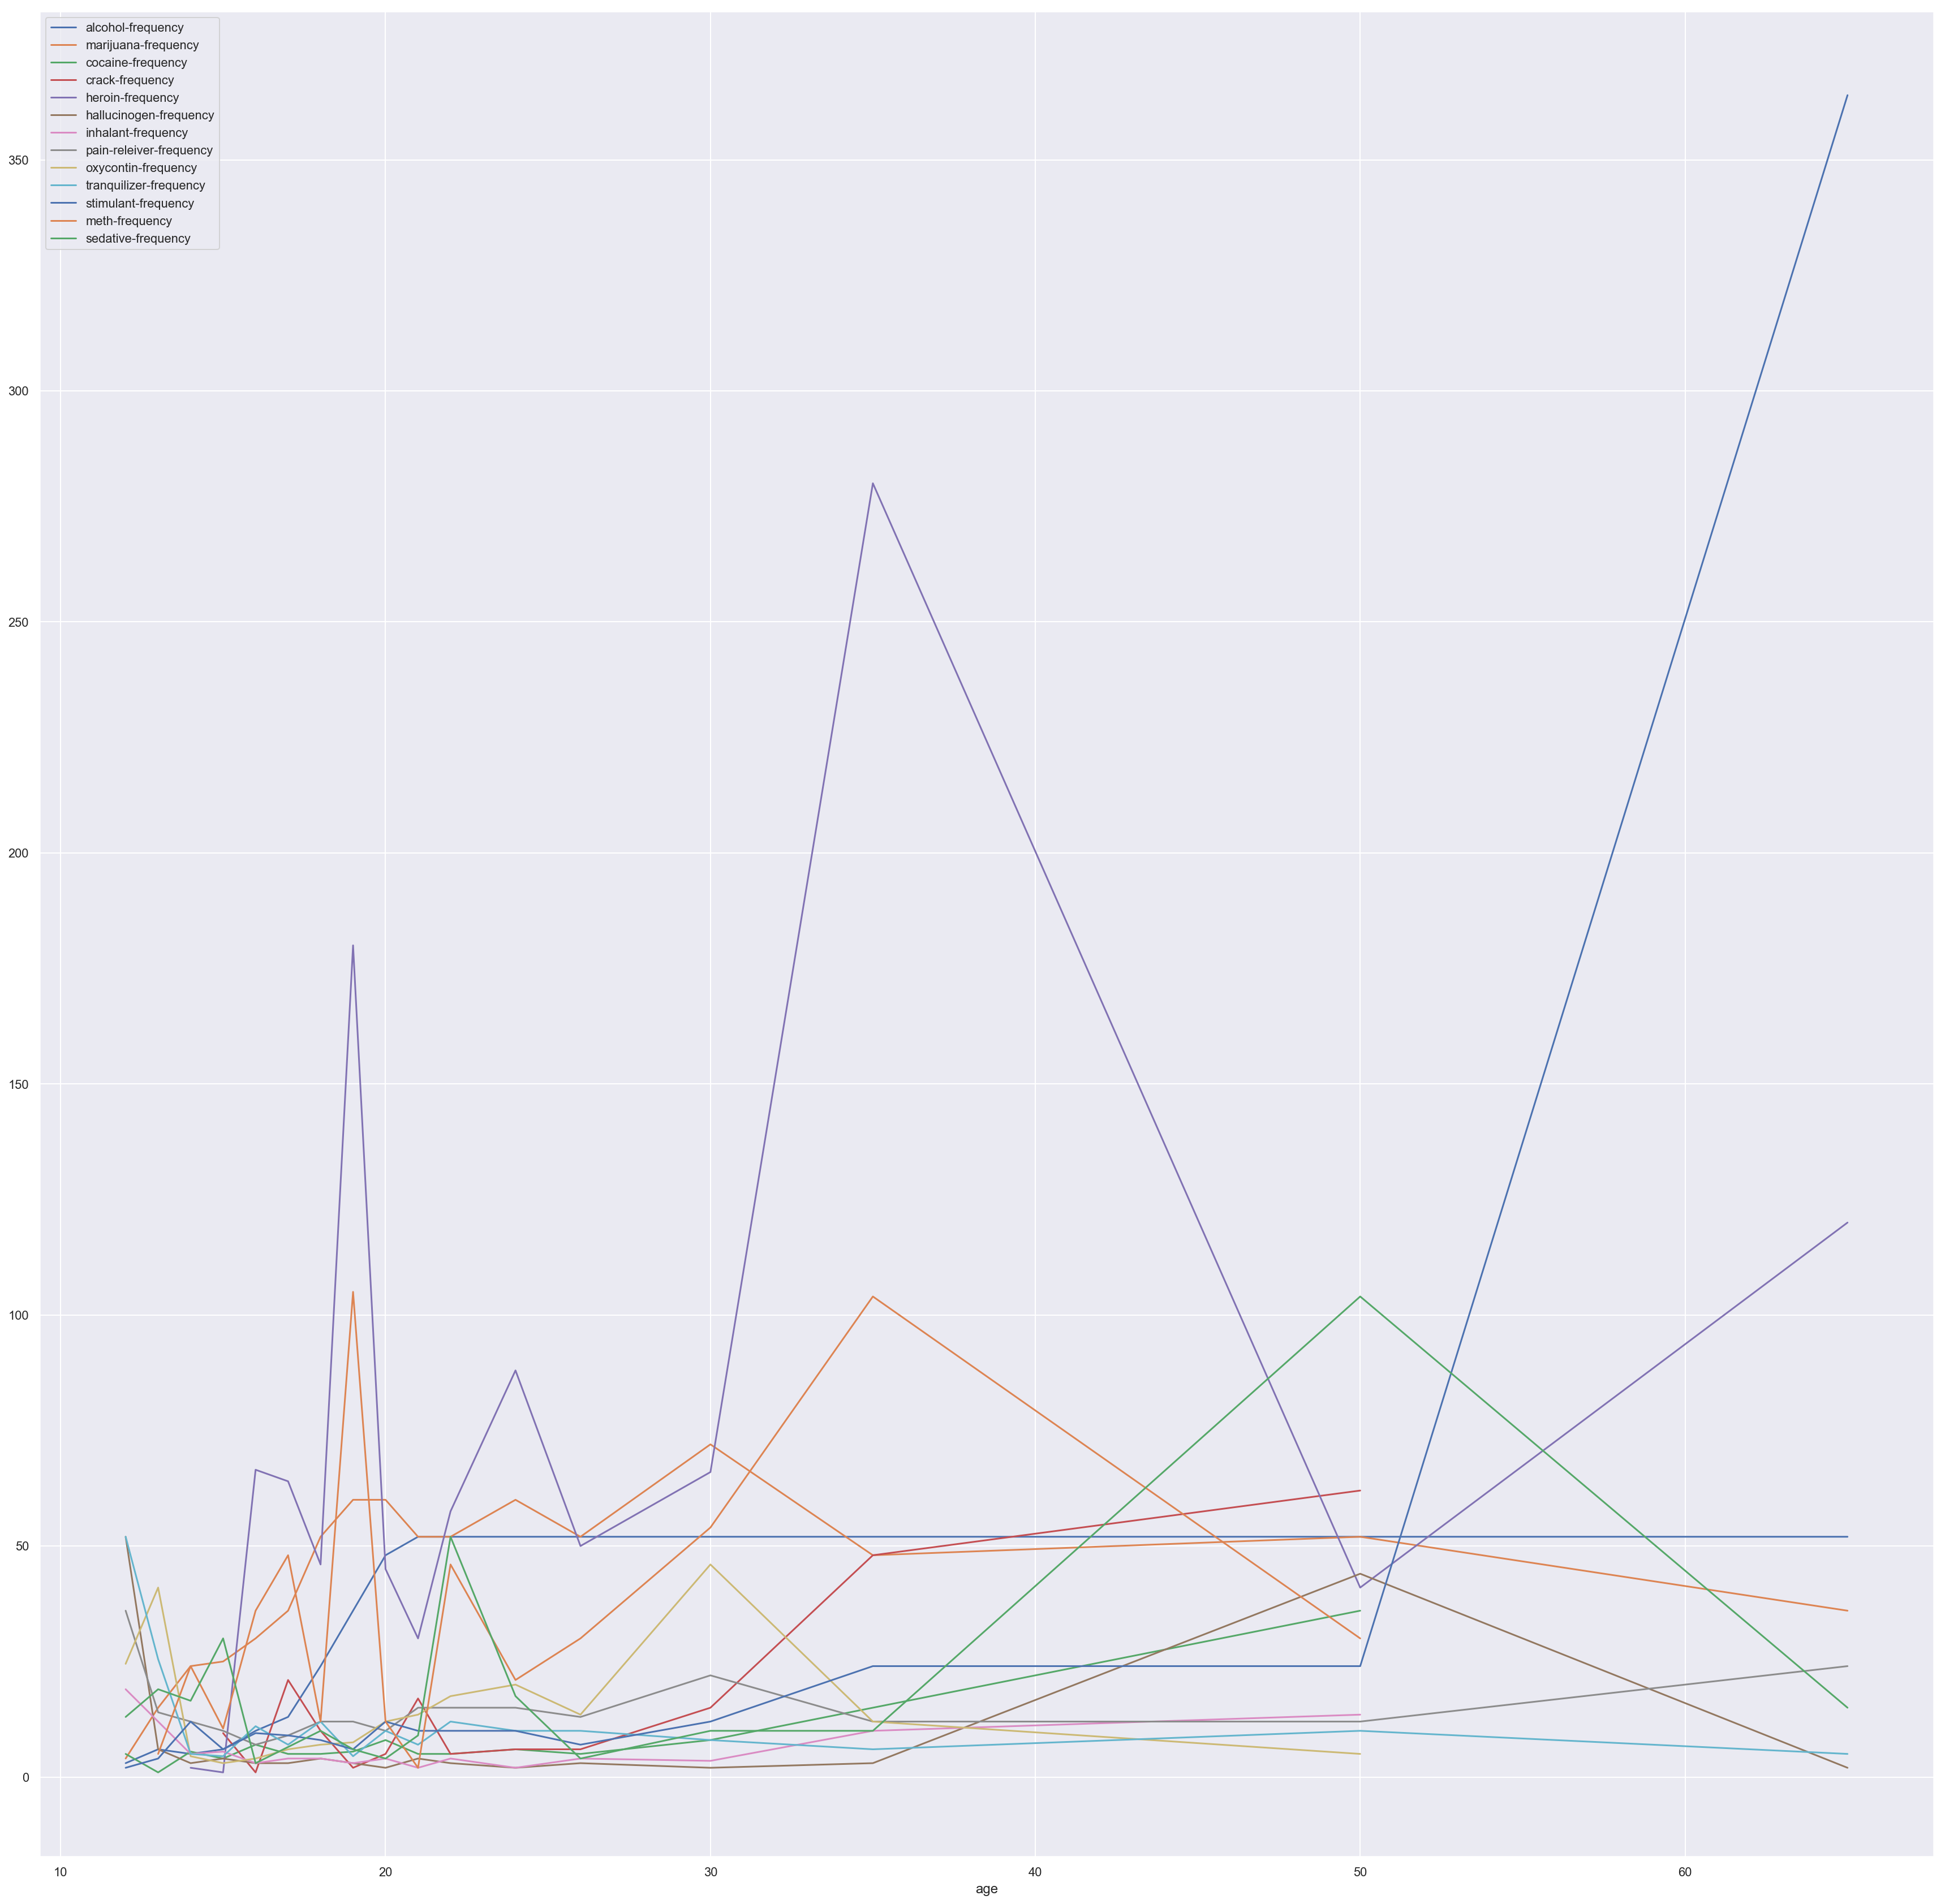

In [155]:
drugdf.plot.line(x='age', y=frequencies);

### Create new column by multiplying frequency by use

In [156]:
total =[]
for uses,frequency in zip(use,frequencies):
    word = uses.rsplit('-',1)[0] + '-total'
    total.append(word)
    drugdf[word] = drugdf[uses] * drugdf[frequency]

### Cumulative over Age

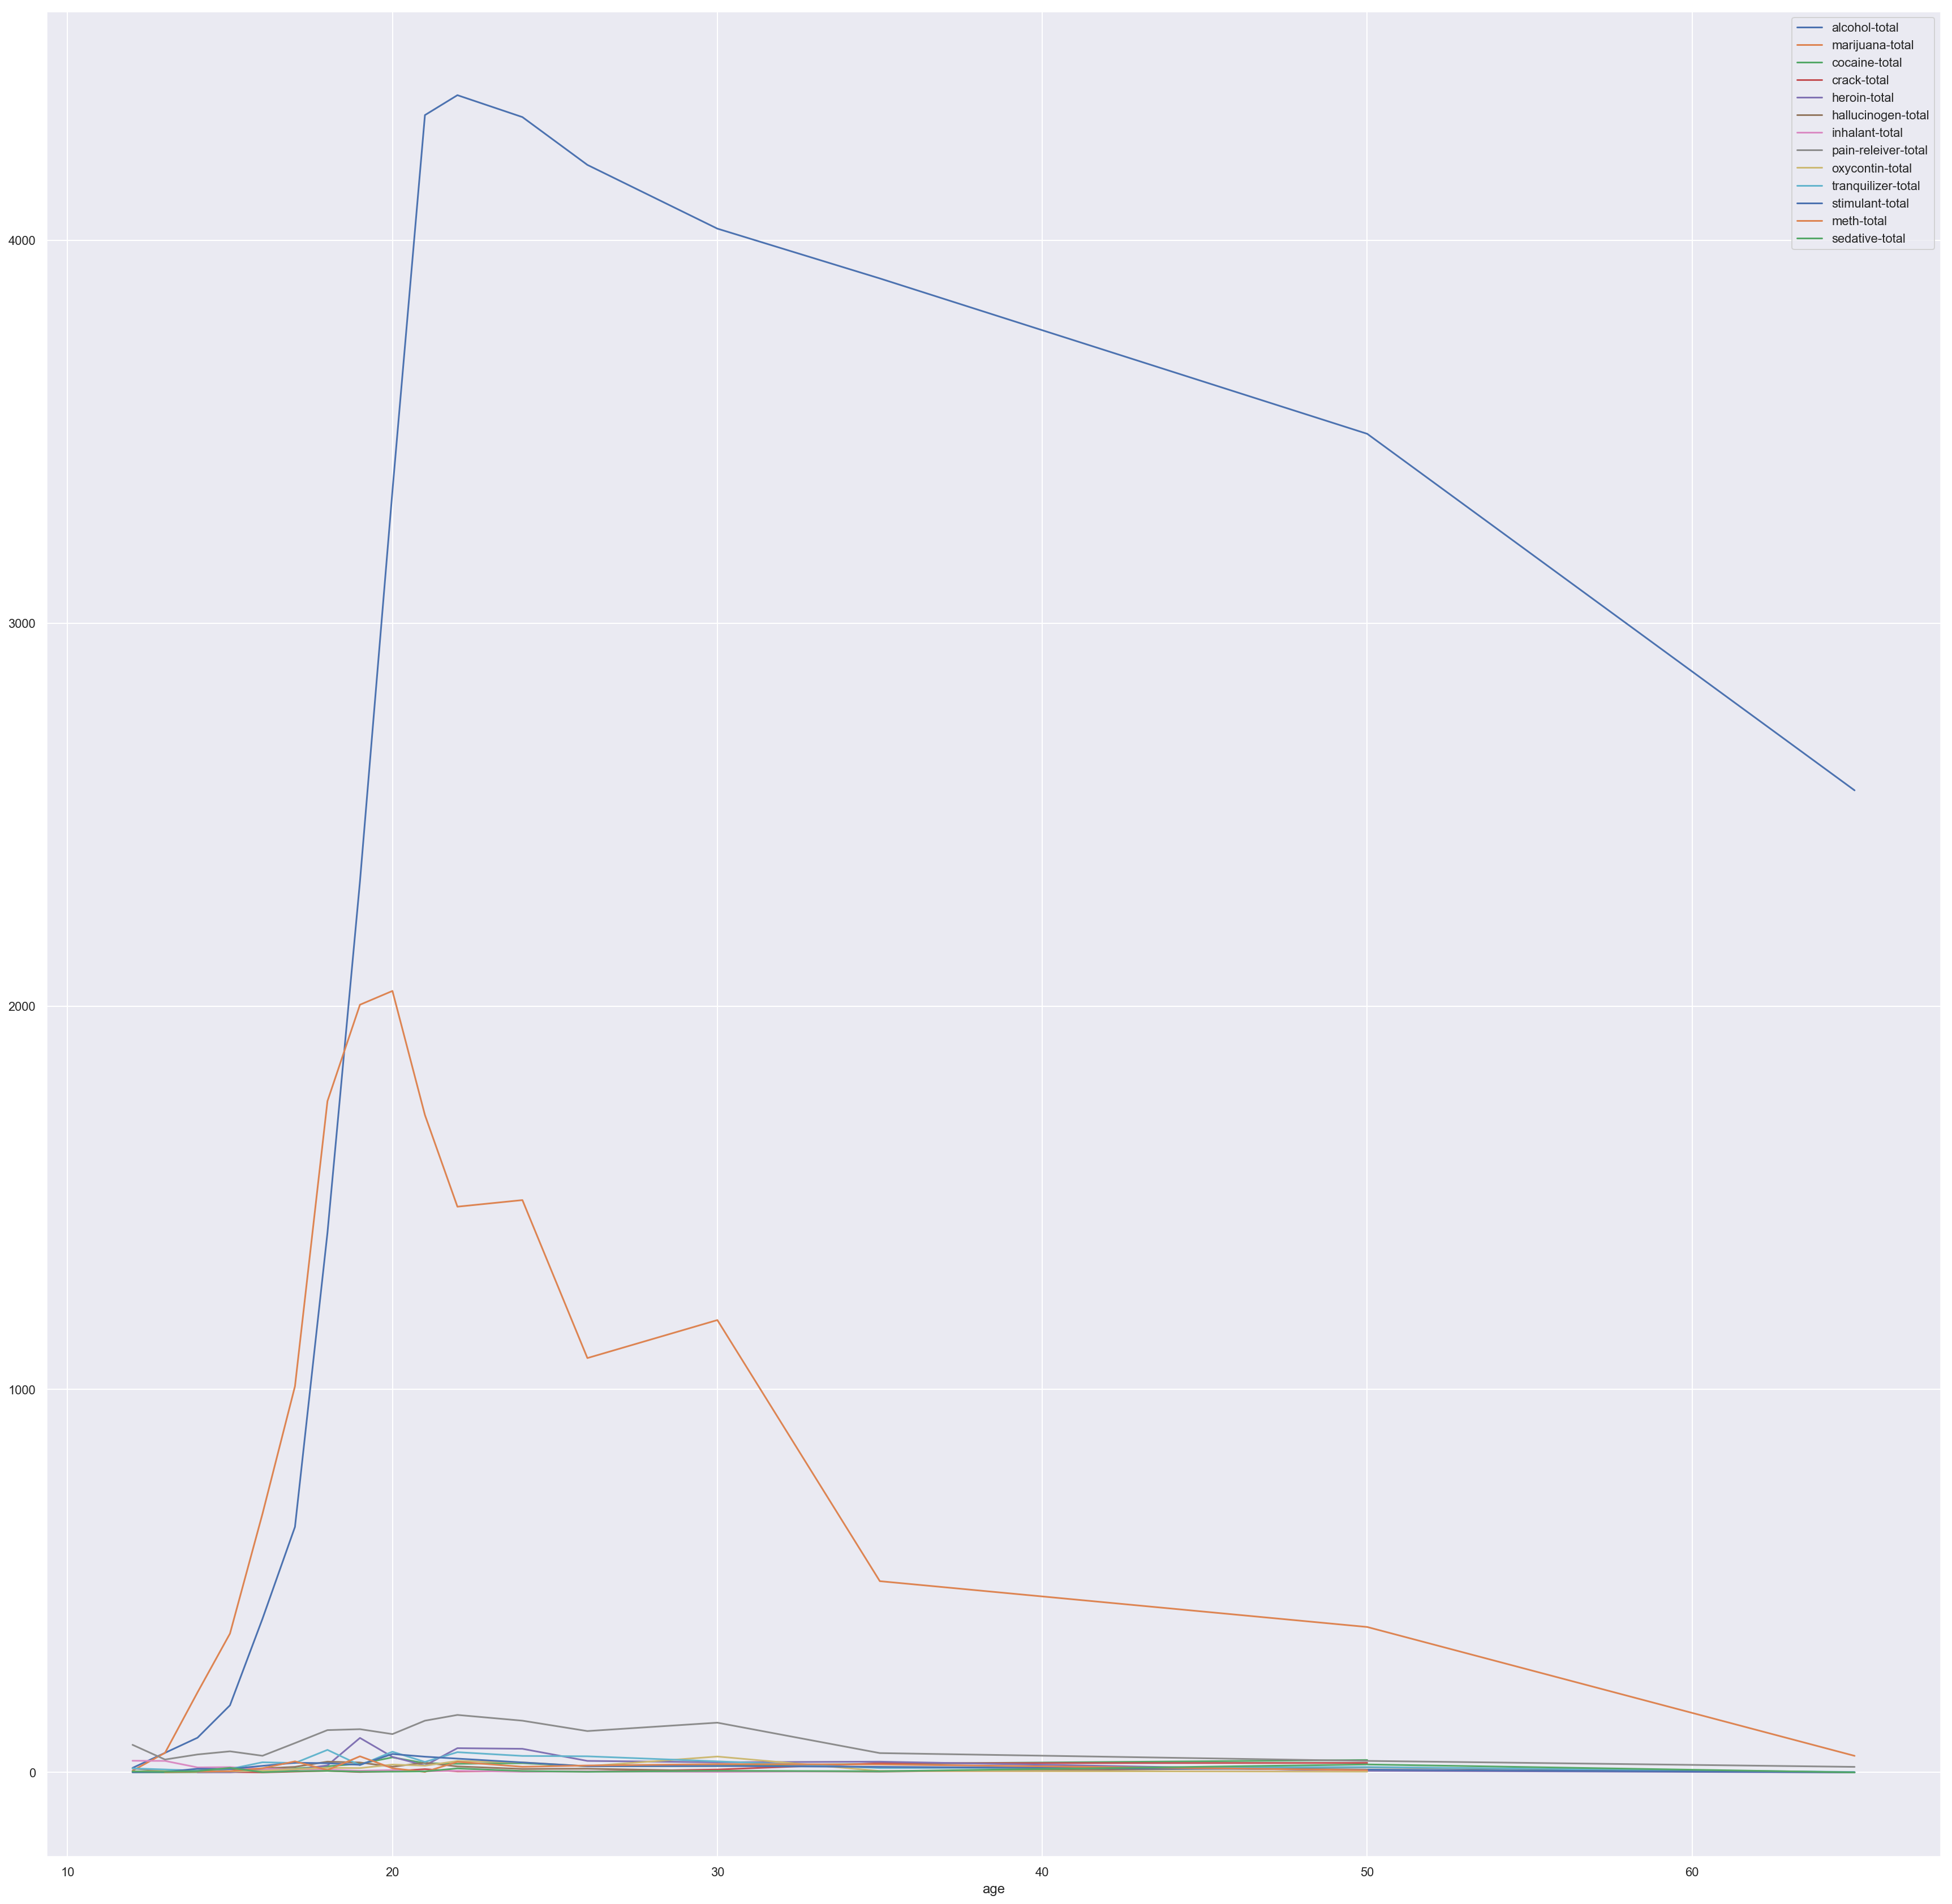

In [159]:
drugdf.plot(x='age', y=total);

### Remove Marijuana and Alcohol to see further Details of Other Drug uses

In [160]:
totalExcMA =total[:]
totalExcMA.remove('marijuana-total')
totalExcMA.remove('alcohol-total')

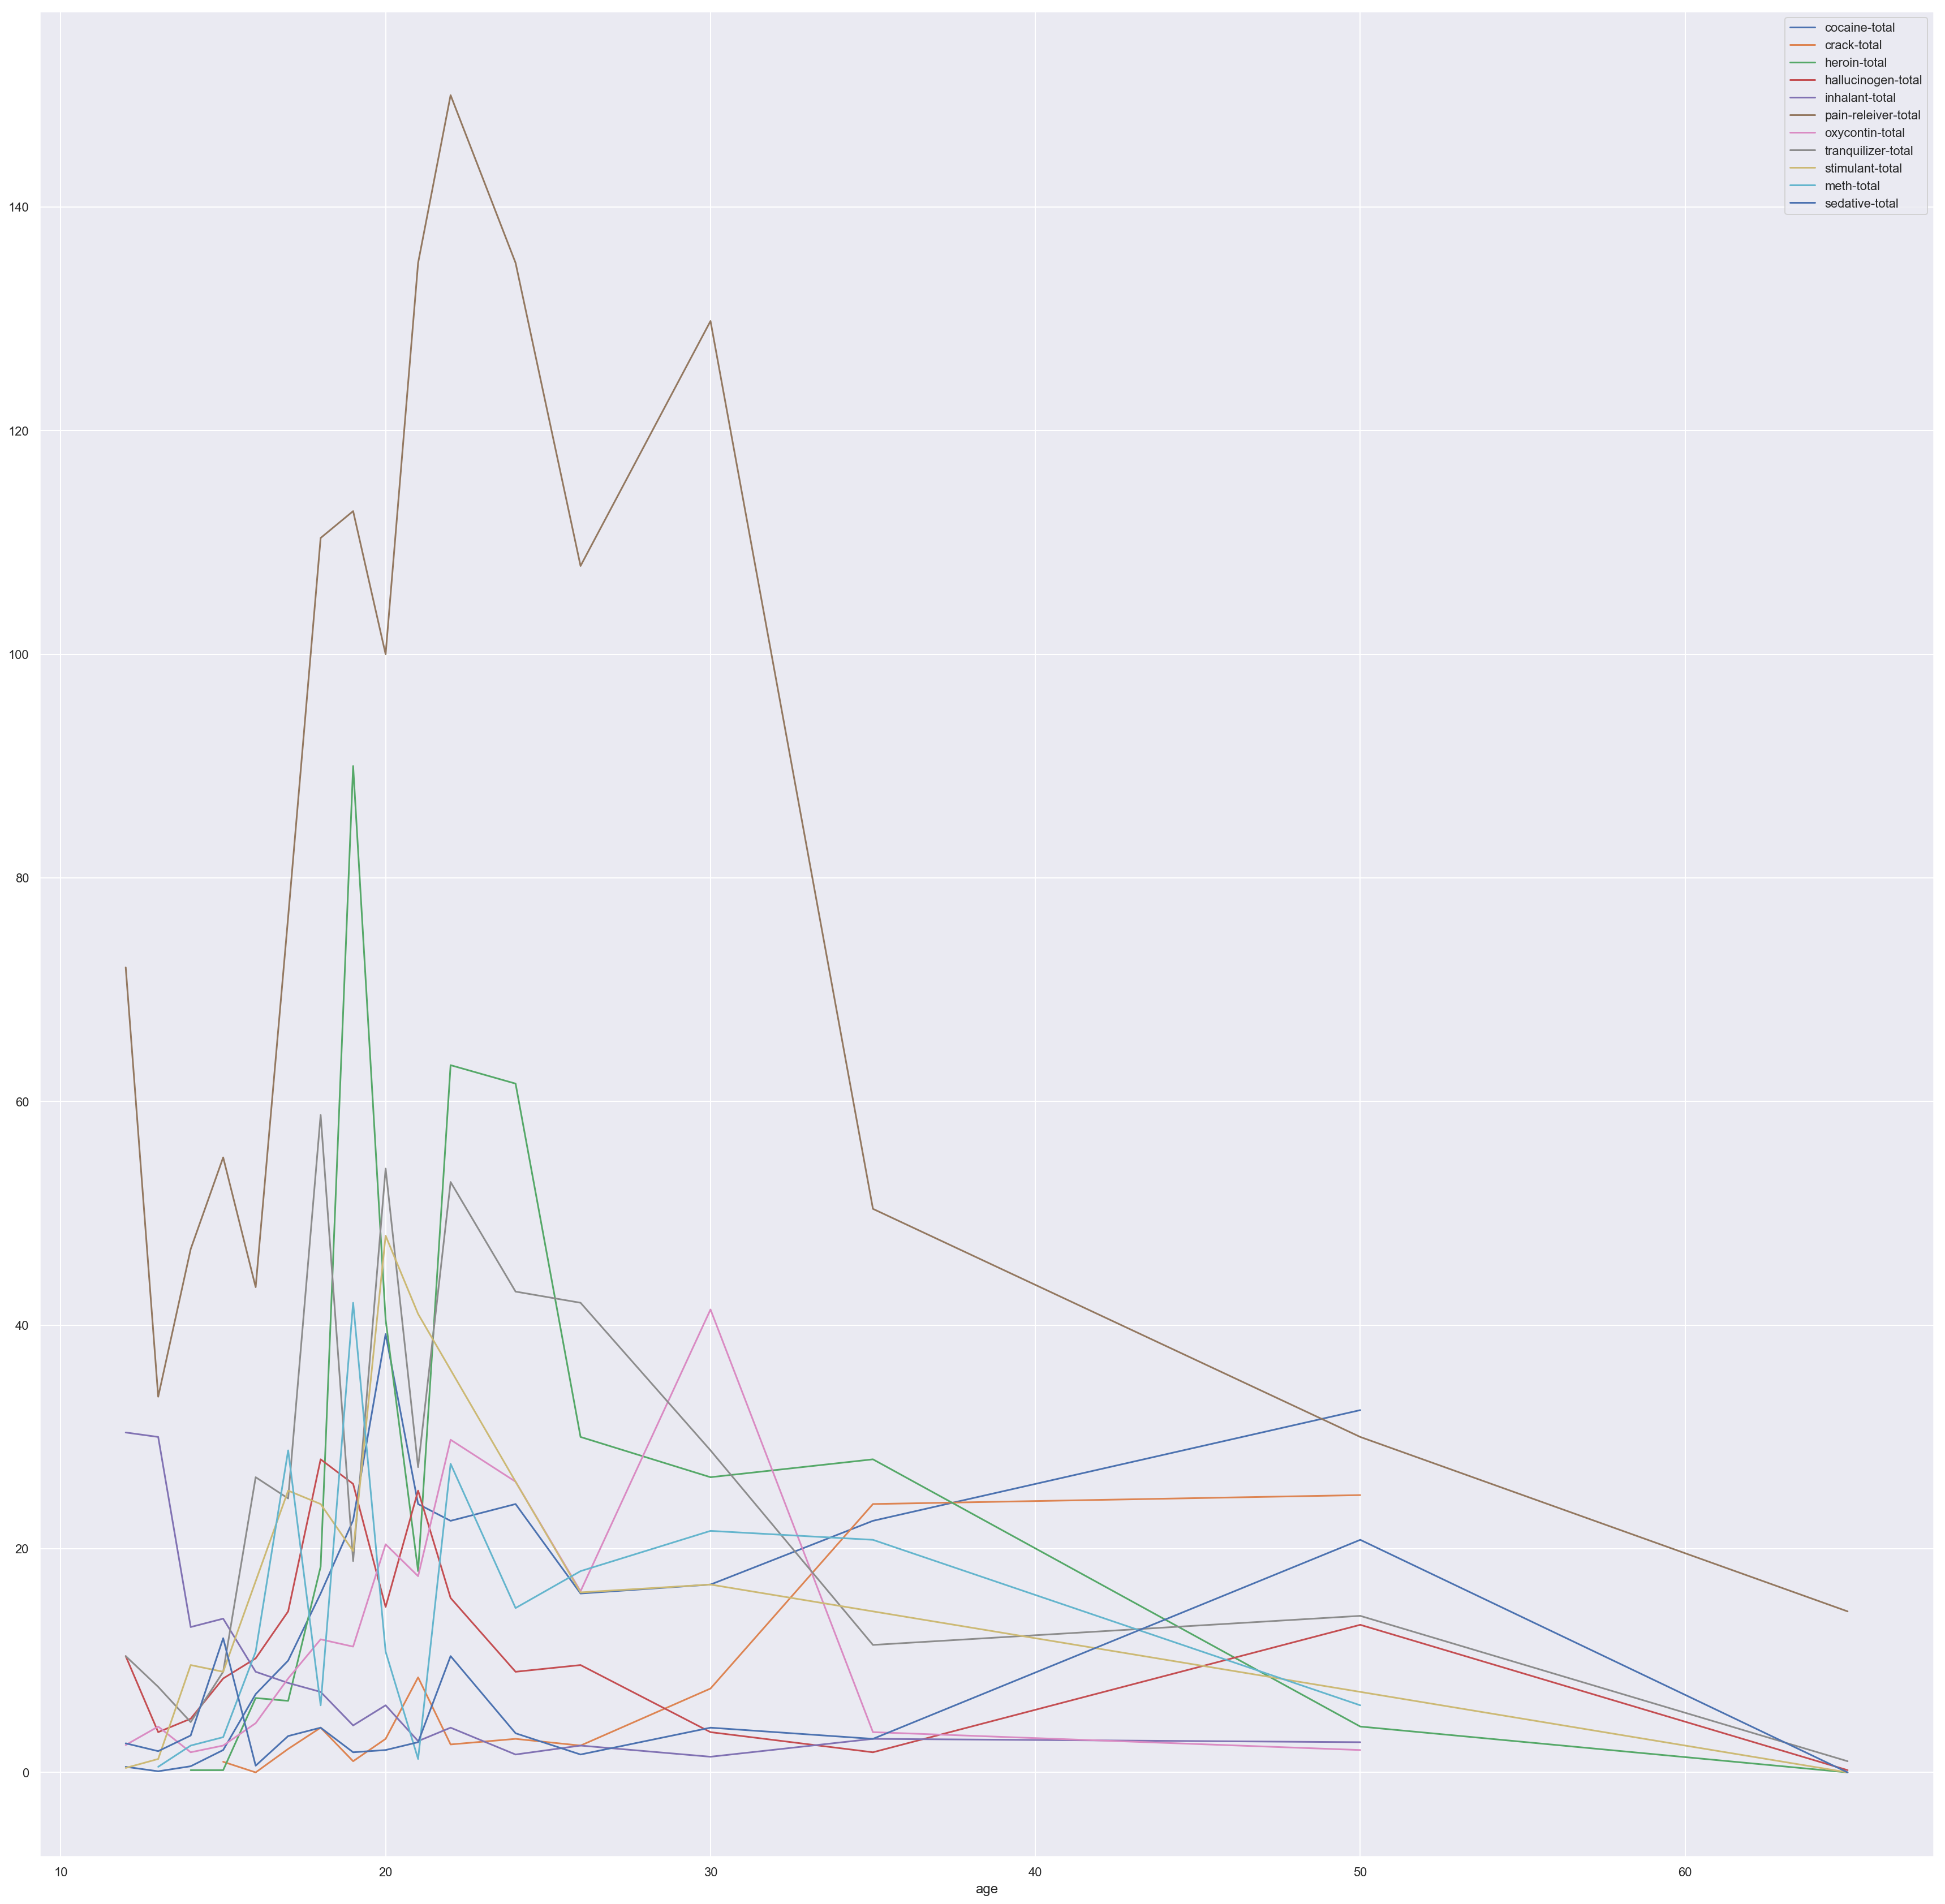

In [162]:
drugdf.plot(x='age', y=totalExcMA);

### Heatmap of Total Correlations

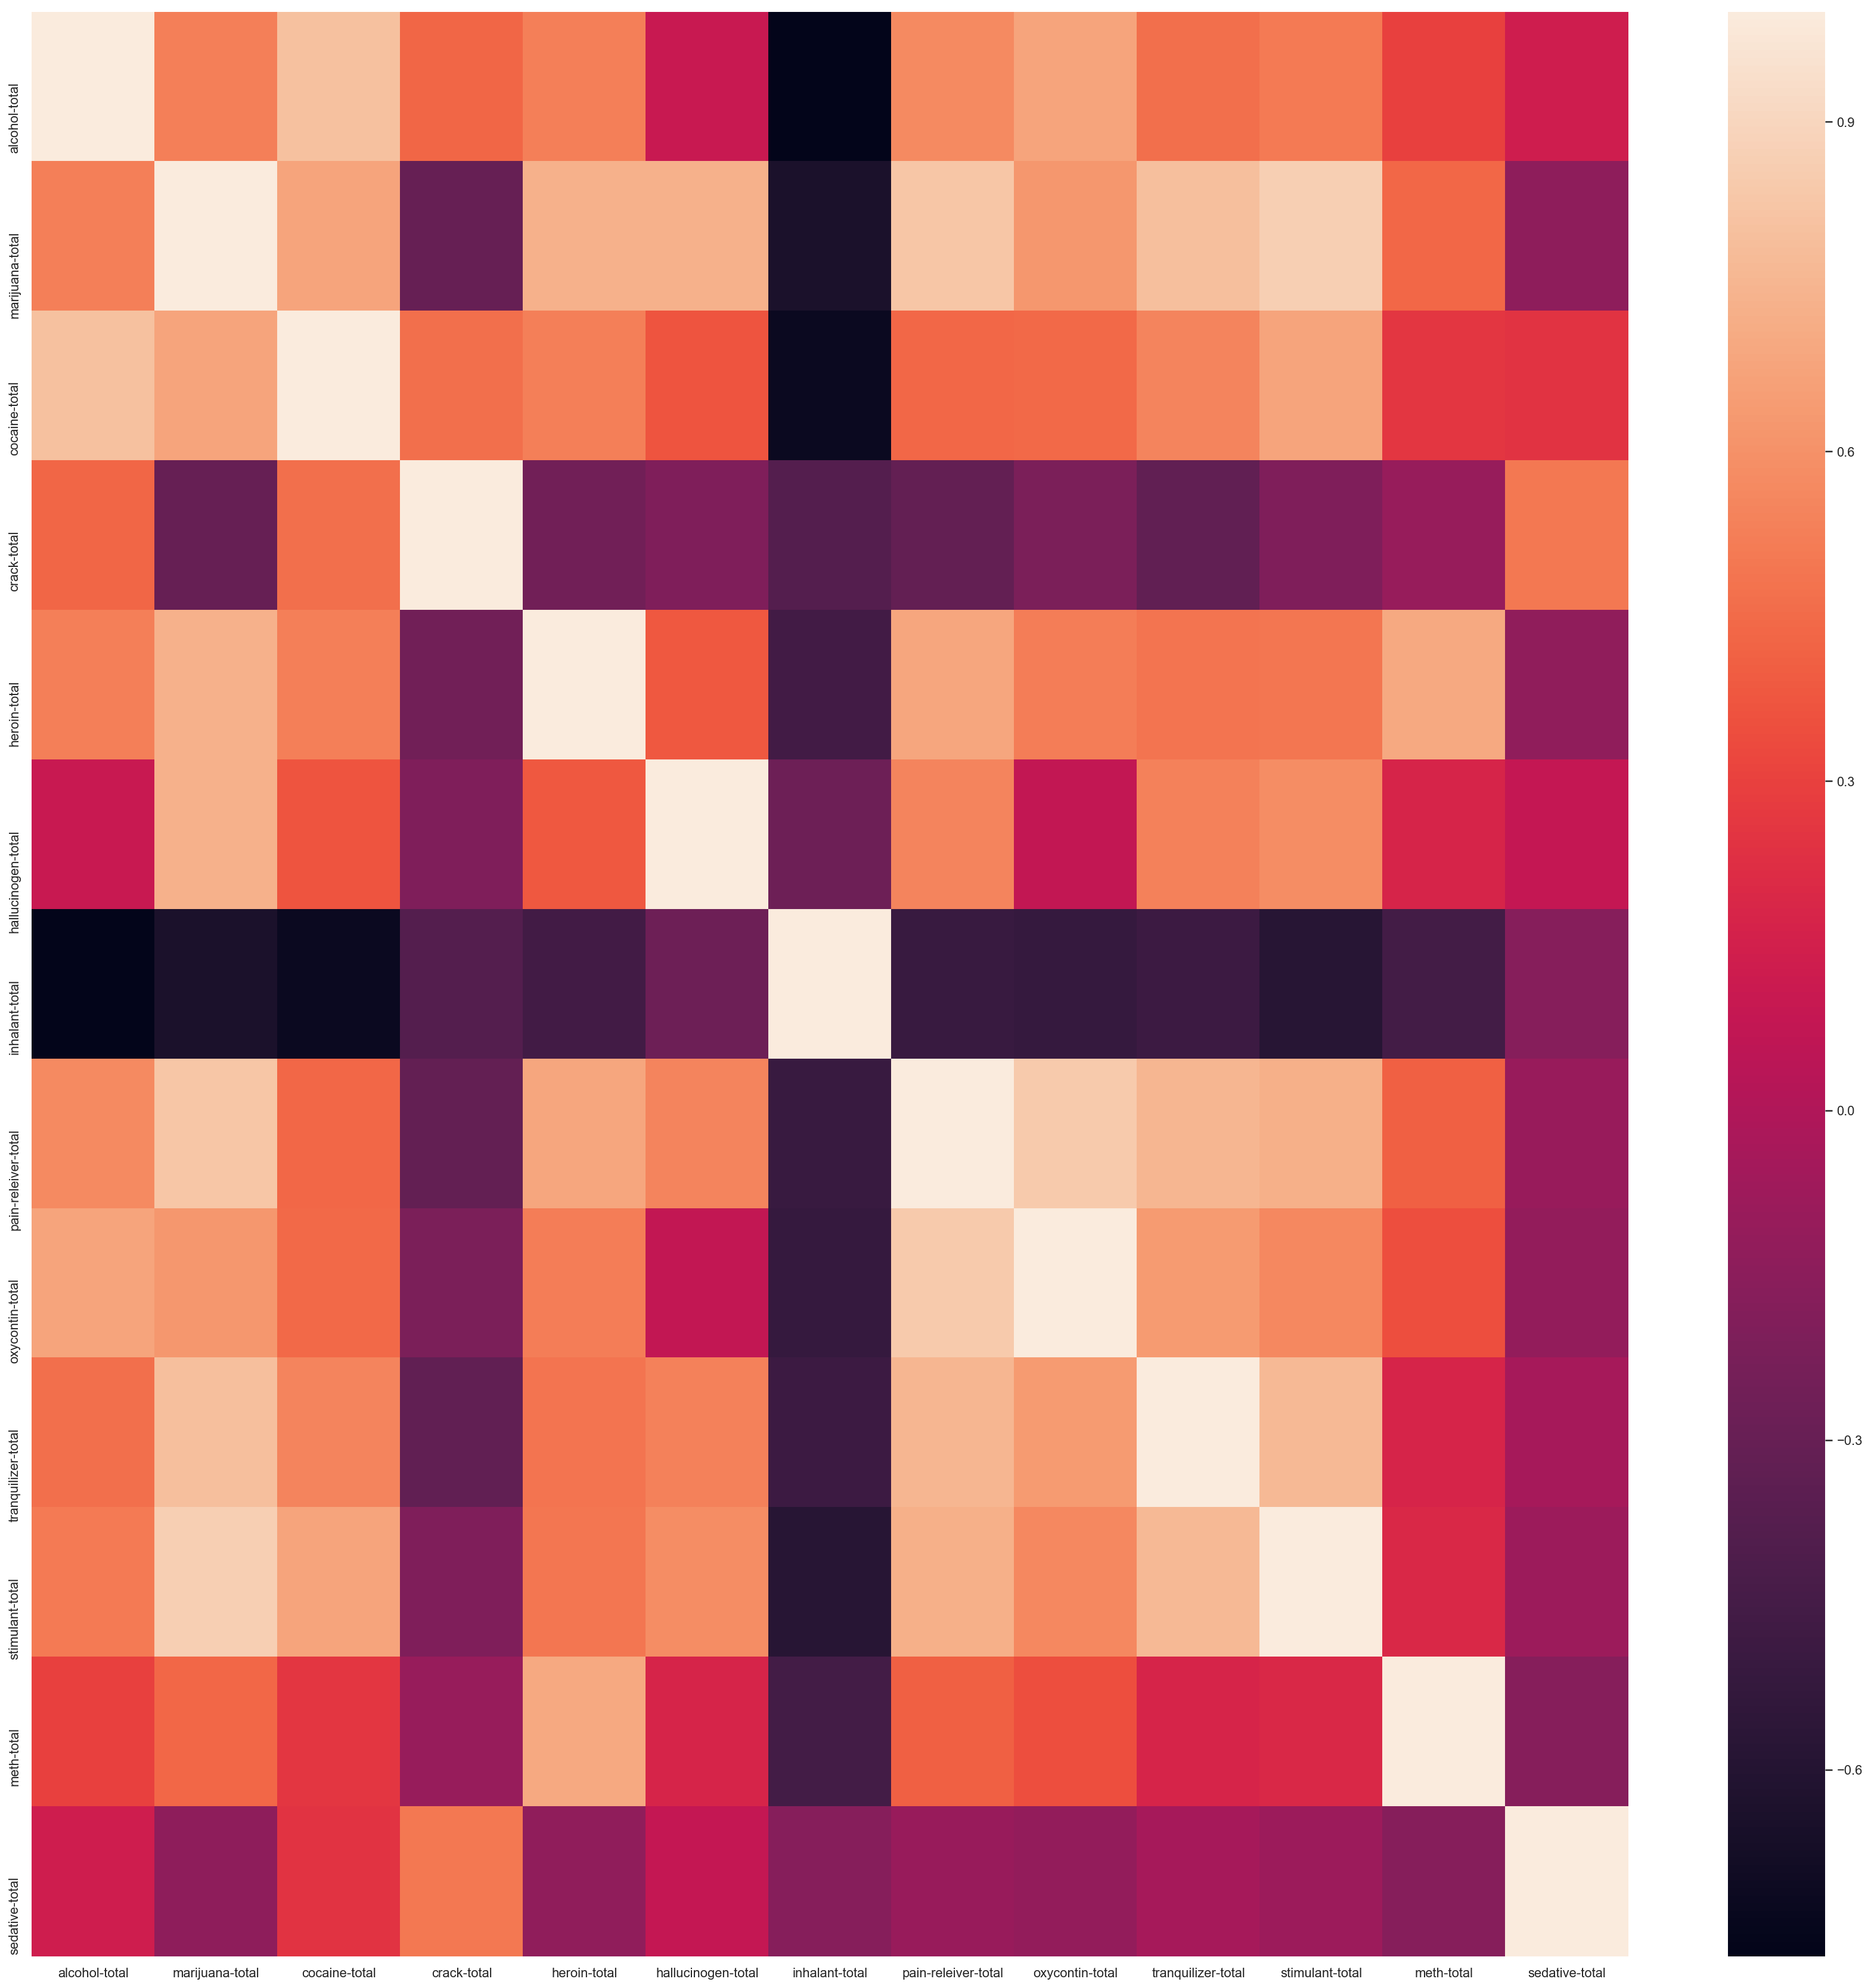

In [163]:
sns.heatmap(drugdf[total].corr());

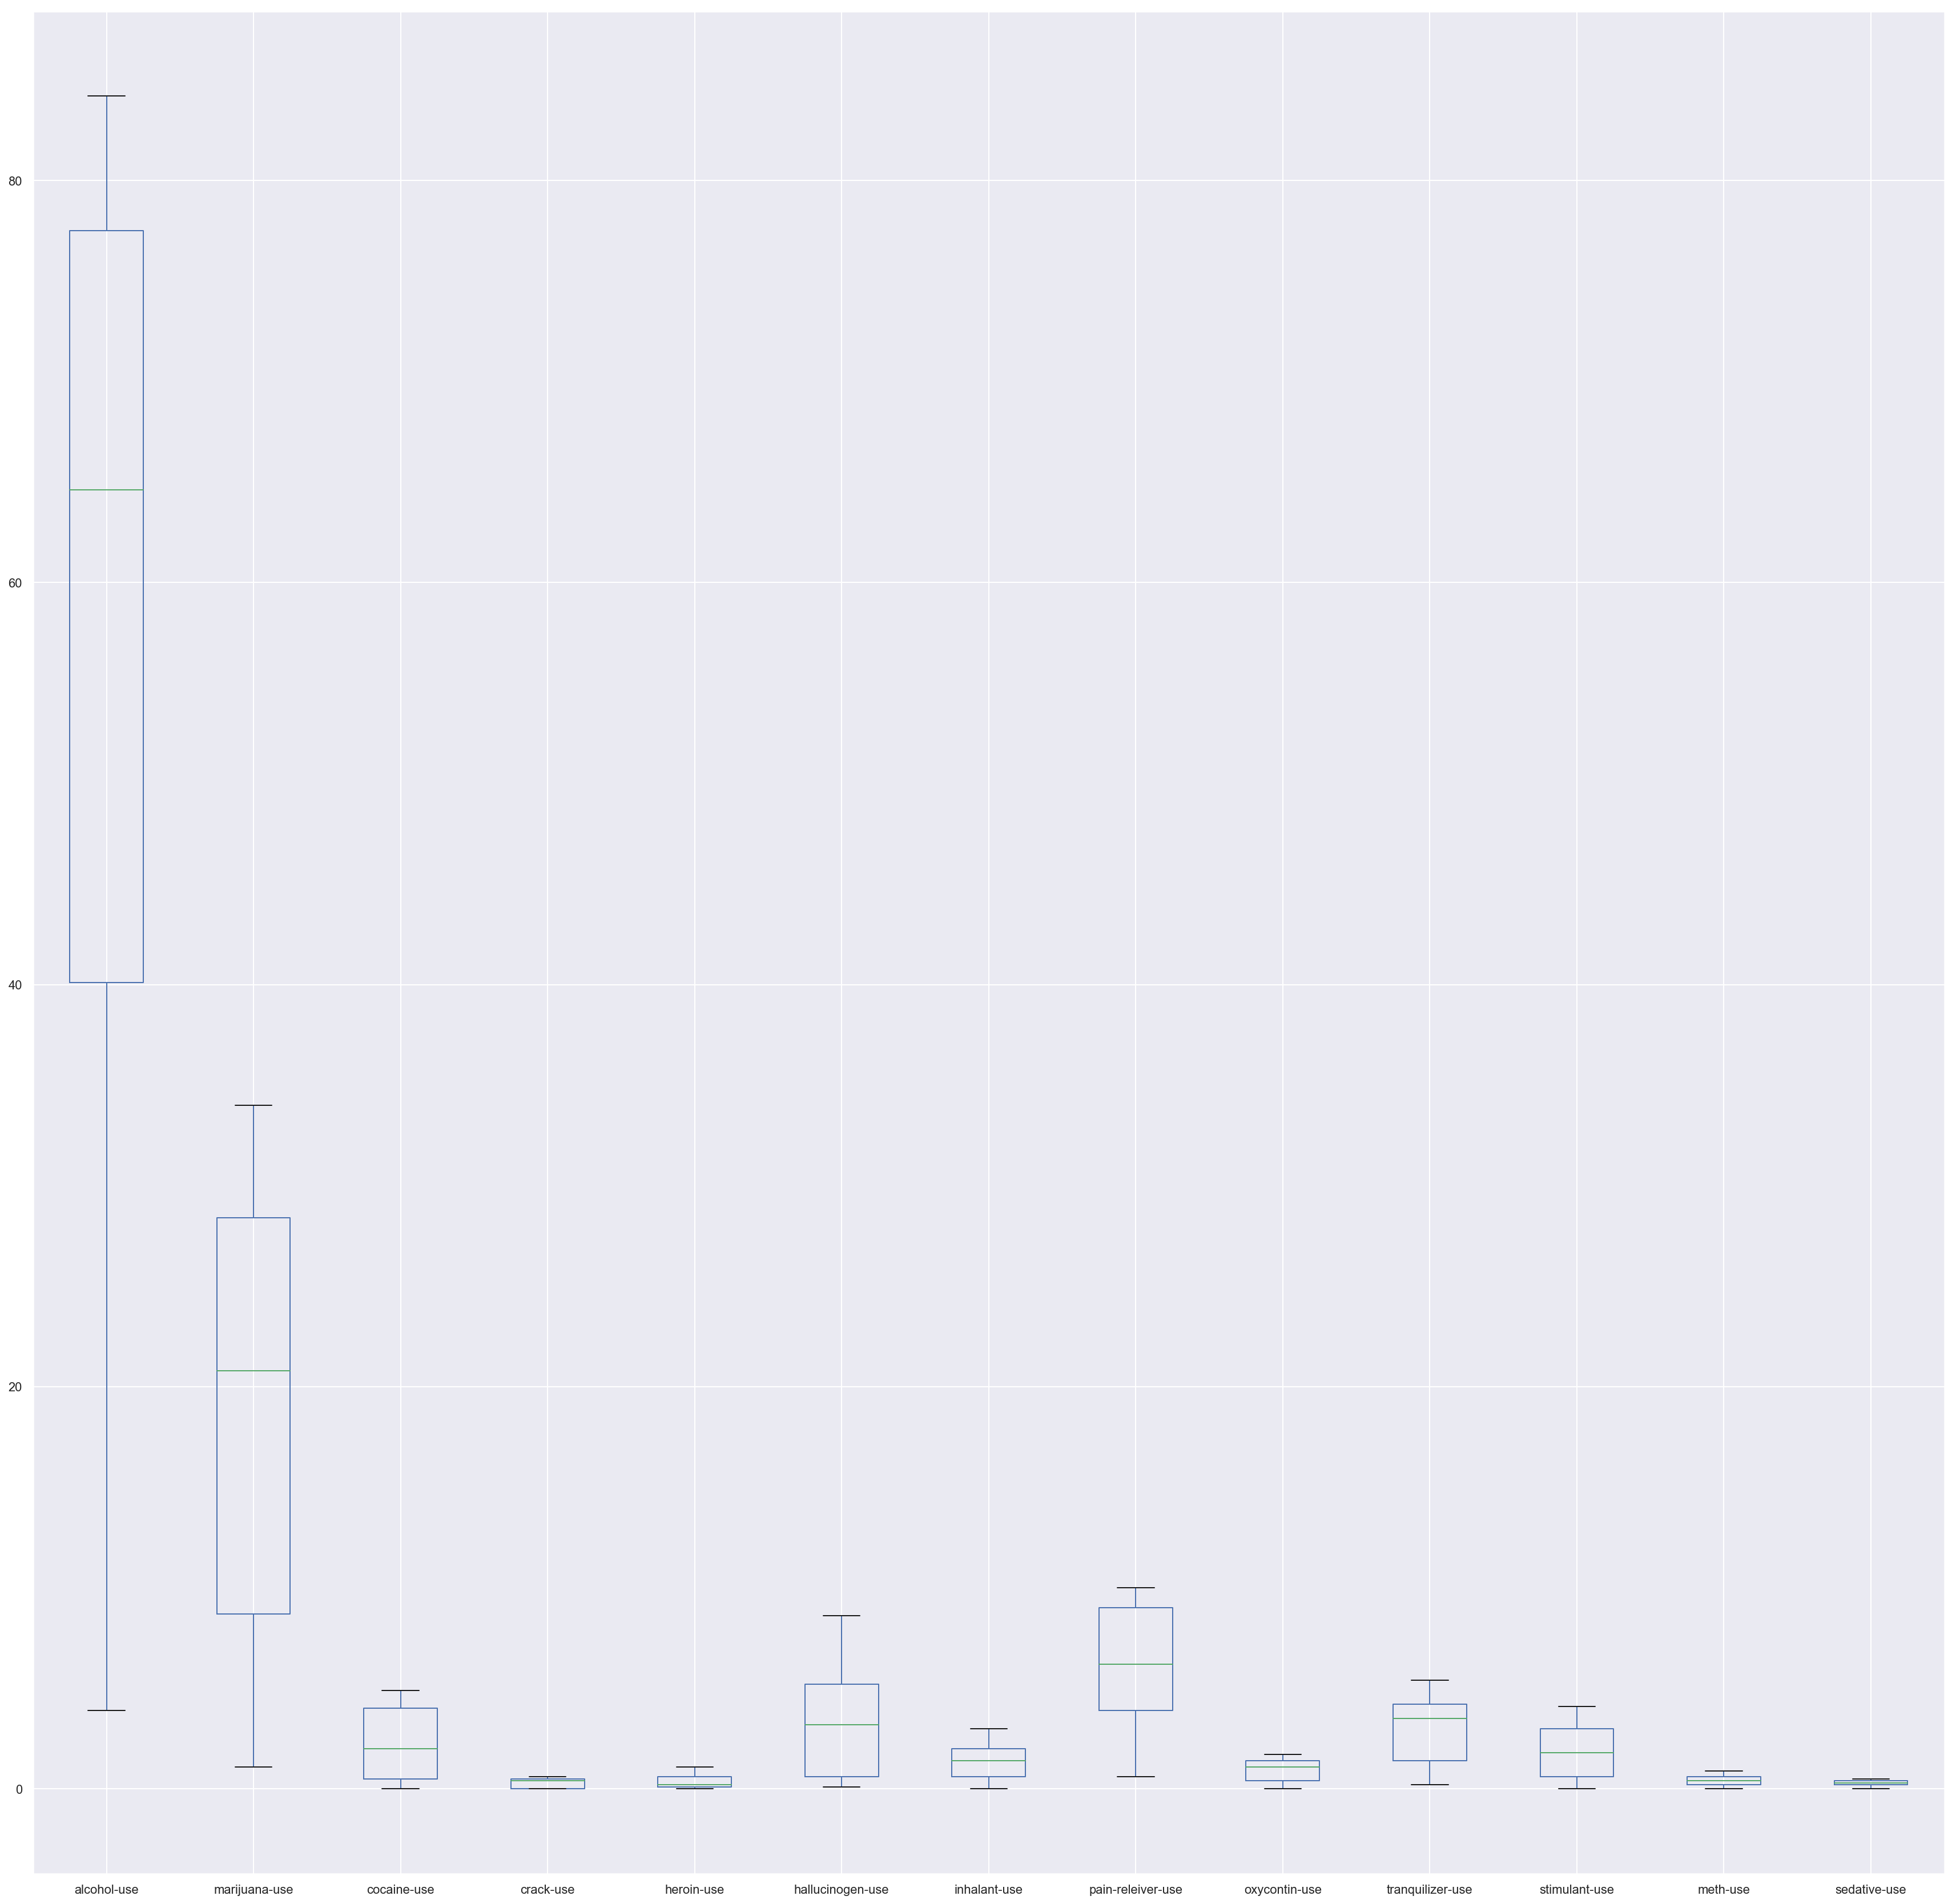

In [166]:
drugdf.boxplot(column=use);

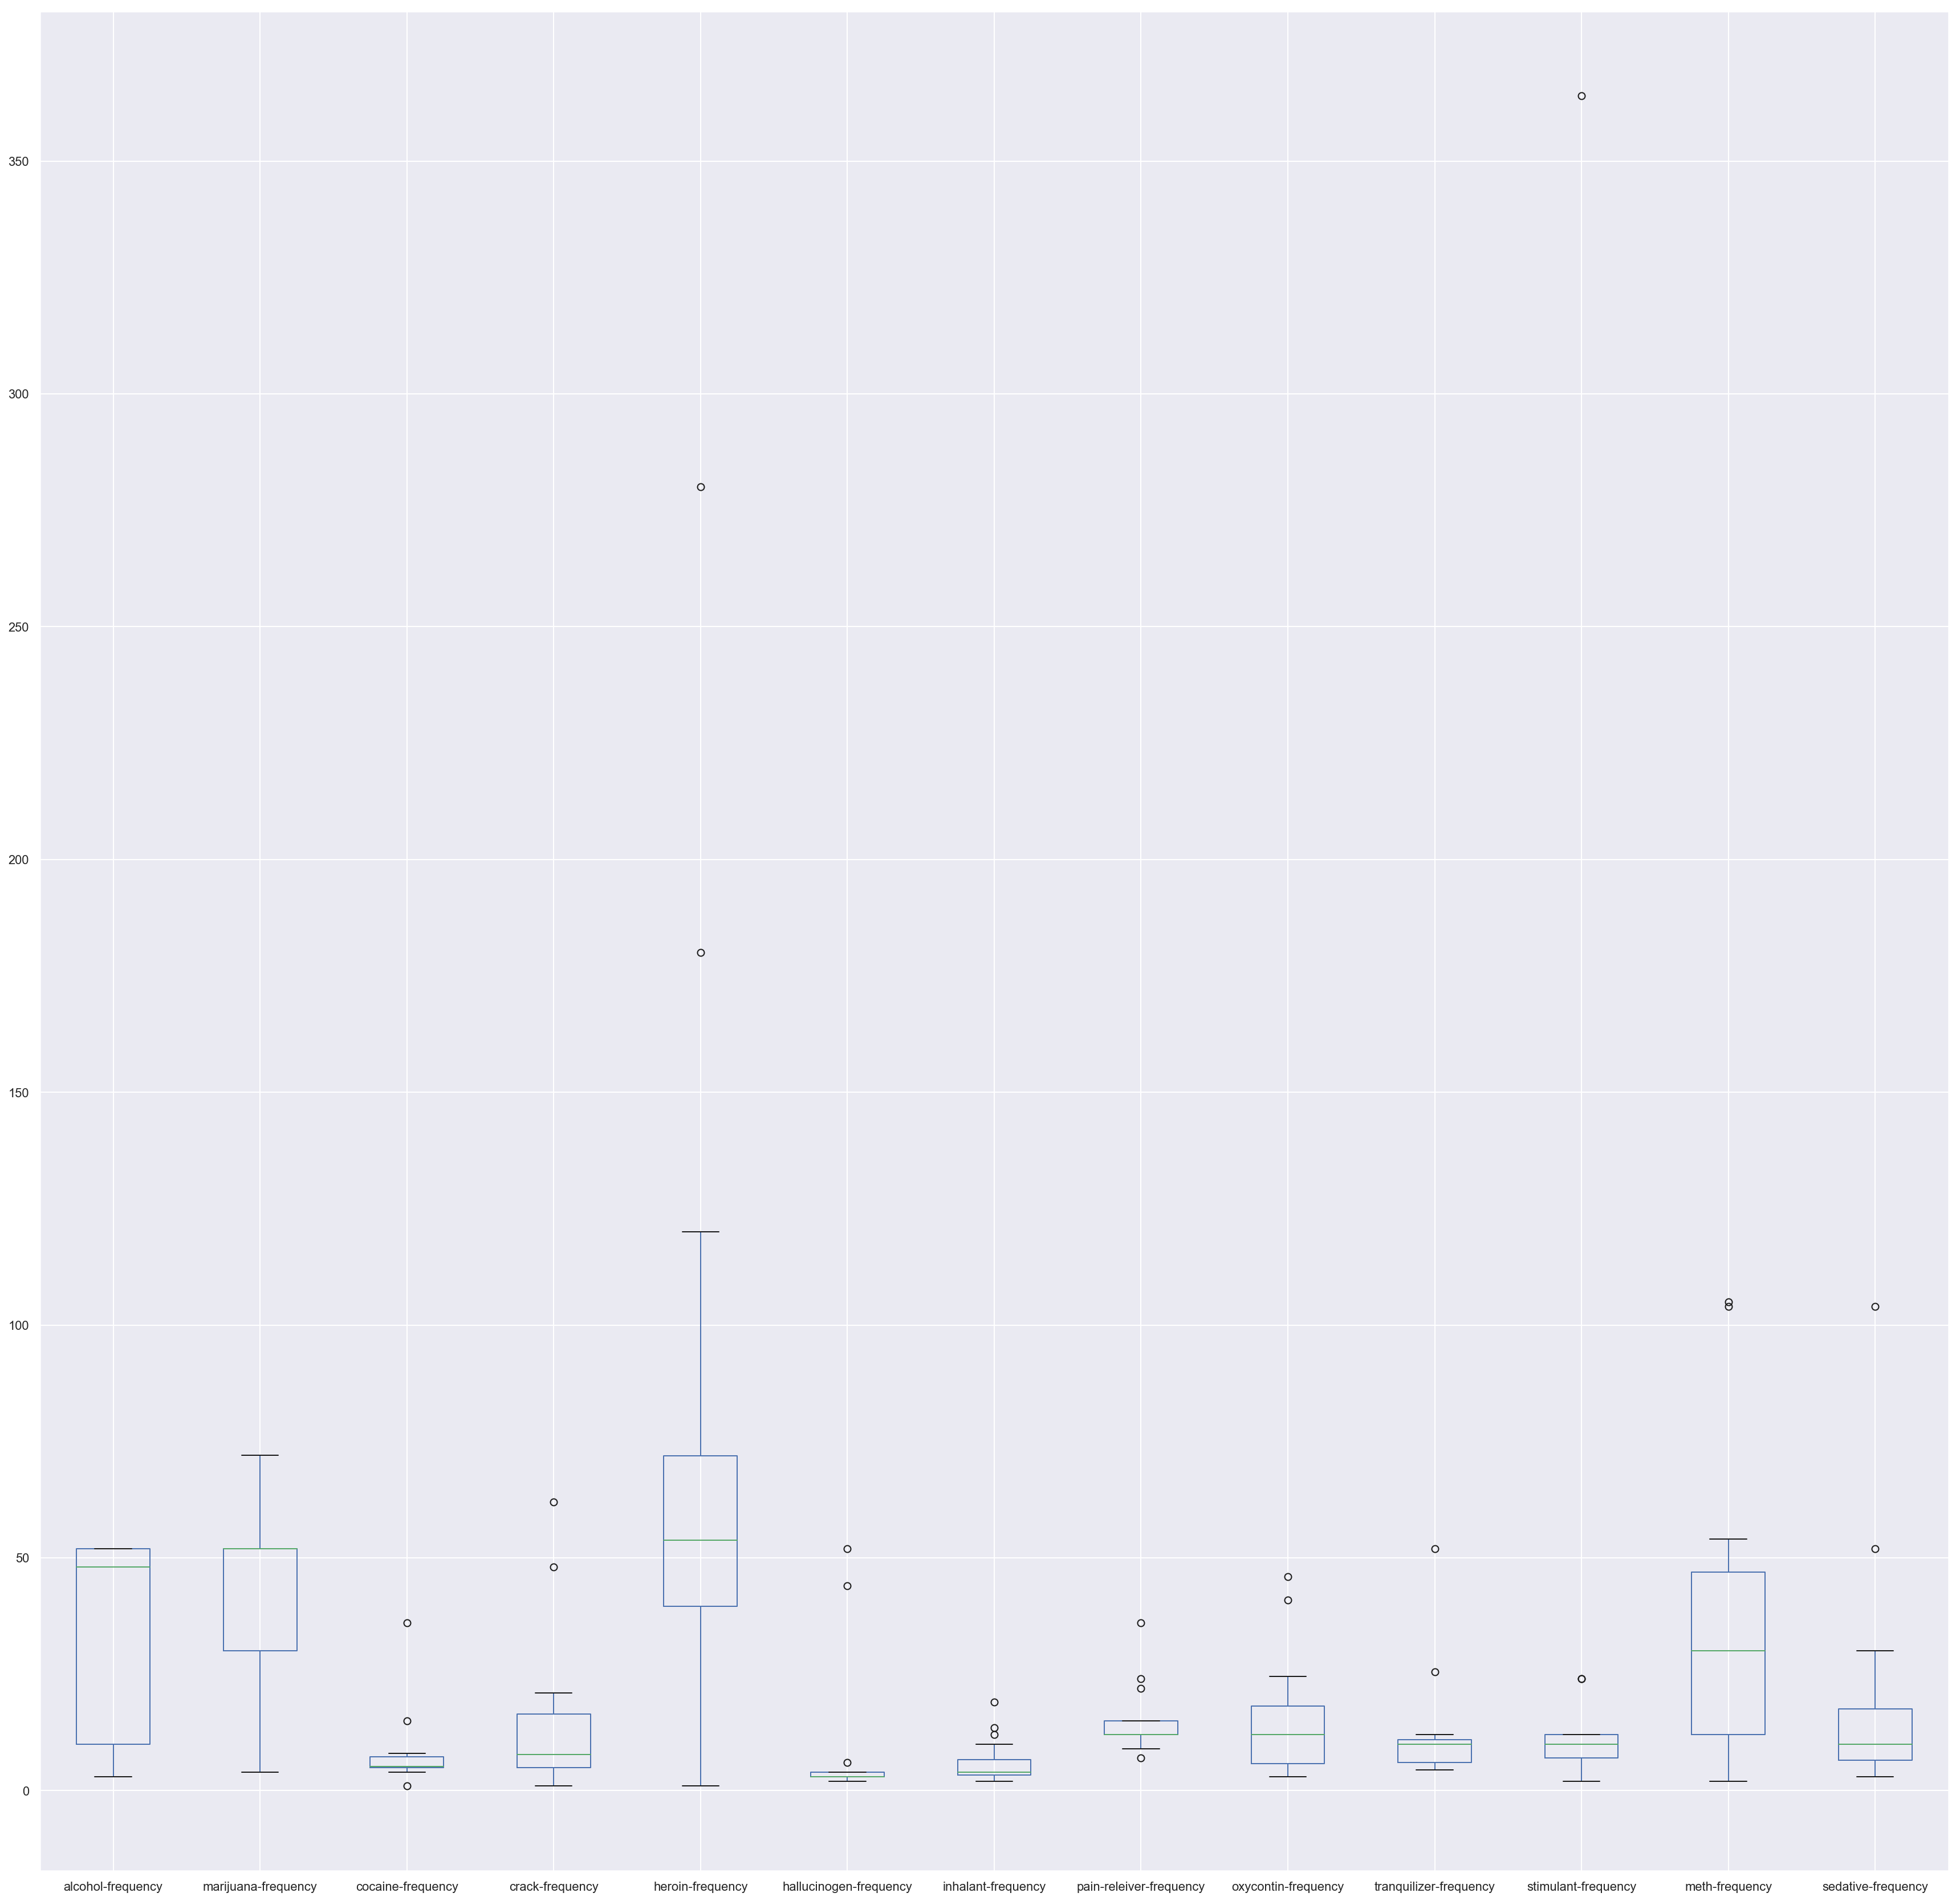

In [167]:
drugdf.boxplot(column=frequencies);

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Abstract:

The concept of “gateway hypothesis” has been studied since the 1970s (Kandel, 1975, Kandel and Faust, 1975) as the theory suggests that an adolescent's early experimentation with alcohol or tobacco or cannabis escalates to more addictive illicit drugs later in adulthood (Lynskey et al., 2003). Most commonly used illicit substances include heroin/opioids, cocaine and or amphetamines and their designer drug analogs, considered illegal by the criminal justice system in the United States and other jurisdictions. Early onset or drug experimentation has been elaborated and characterized in distinct pathways in the substance abuse and dependence literature. Overall, the theory has had mixed results showing both a link or sequence of licit drug use to illicit drug use (Guxens et al., 2007, Guxens et al., 2007, Korhoene et al., 2010, Lessem et al., 2006, Mayet et al., 2012) and no association (Mackesy-Amiti et al., 1997, Golub and Johnson, 1994).

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4929049/  - Introduction.


#### Question
1. Is marijuana a "gateway" drug linking to hard drug usage? Usage of marijuana is later followed by an increase in other hard drugs.


##### Deliverables
2. provide visualizations on increase in marijuana against increase in hard drugs.
   Provide statistical confidences and intervals

#### Select and Create Data Frame based on Marijuana Use

In [169]:
marijuana = ['marijuana-use','age']
harddrugs = [ 'crack-use','cocaine-use','meth-use','heroin-use']
marijuana.extend(harddrugs)
marijuanadf = drugdf[marijuana]

In [192]:
marijuanadf.head()

marijuana-use  age  crack-use  cocaine-use  meth-use  heroin-use
0      -1.536158   12  -1.285861    -1.178121 -1.499911   -0.781173
1      -1.337928   13  -1.285861    -1.178121 -1.107627   -1.090009
2      -0.881136   14  -1.285861    -1.178121 -1.107627   -0.781173
3      -0.381251   15  -0.848668    -0.951174 -0.323058   -0.472337
4       0.308246   16  -1.285861    -0.667490 -0.323058   -0.781173

#### Normalised the Drug in question prior to Visualisation

In [171]:
def normalize(column):
    mean = np.mean(column)
    std = np.std(column)
    newcolumn = []
    for data in column:
        newdata = (data - mean)/std
        newcolumn.append(newdata)
    return newcolumn

In [172]:
marijuana.remove('age')
for drugs in marijuana:
    marijuanadf[drugs] = normalize(marijuanadf[drugs])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


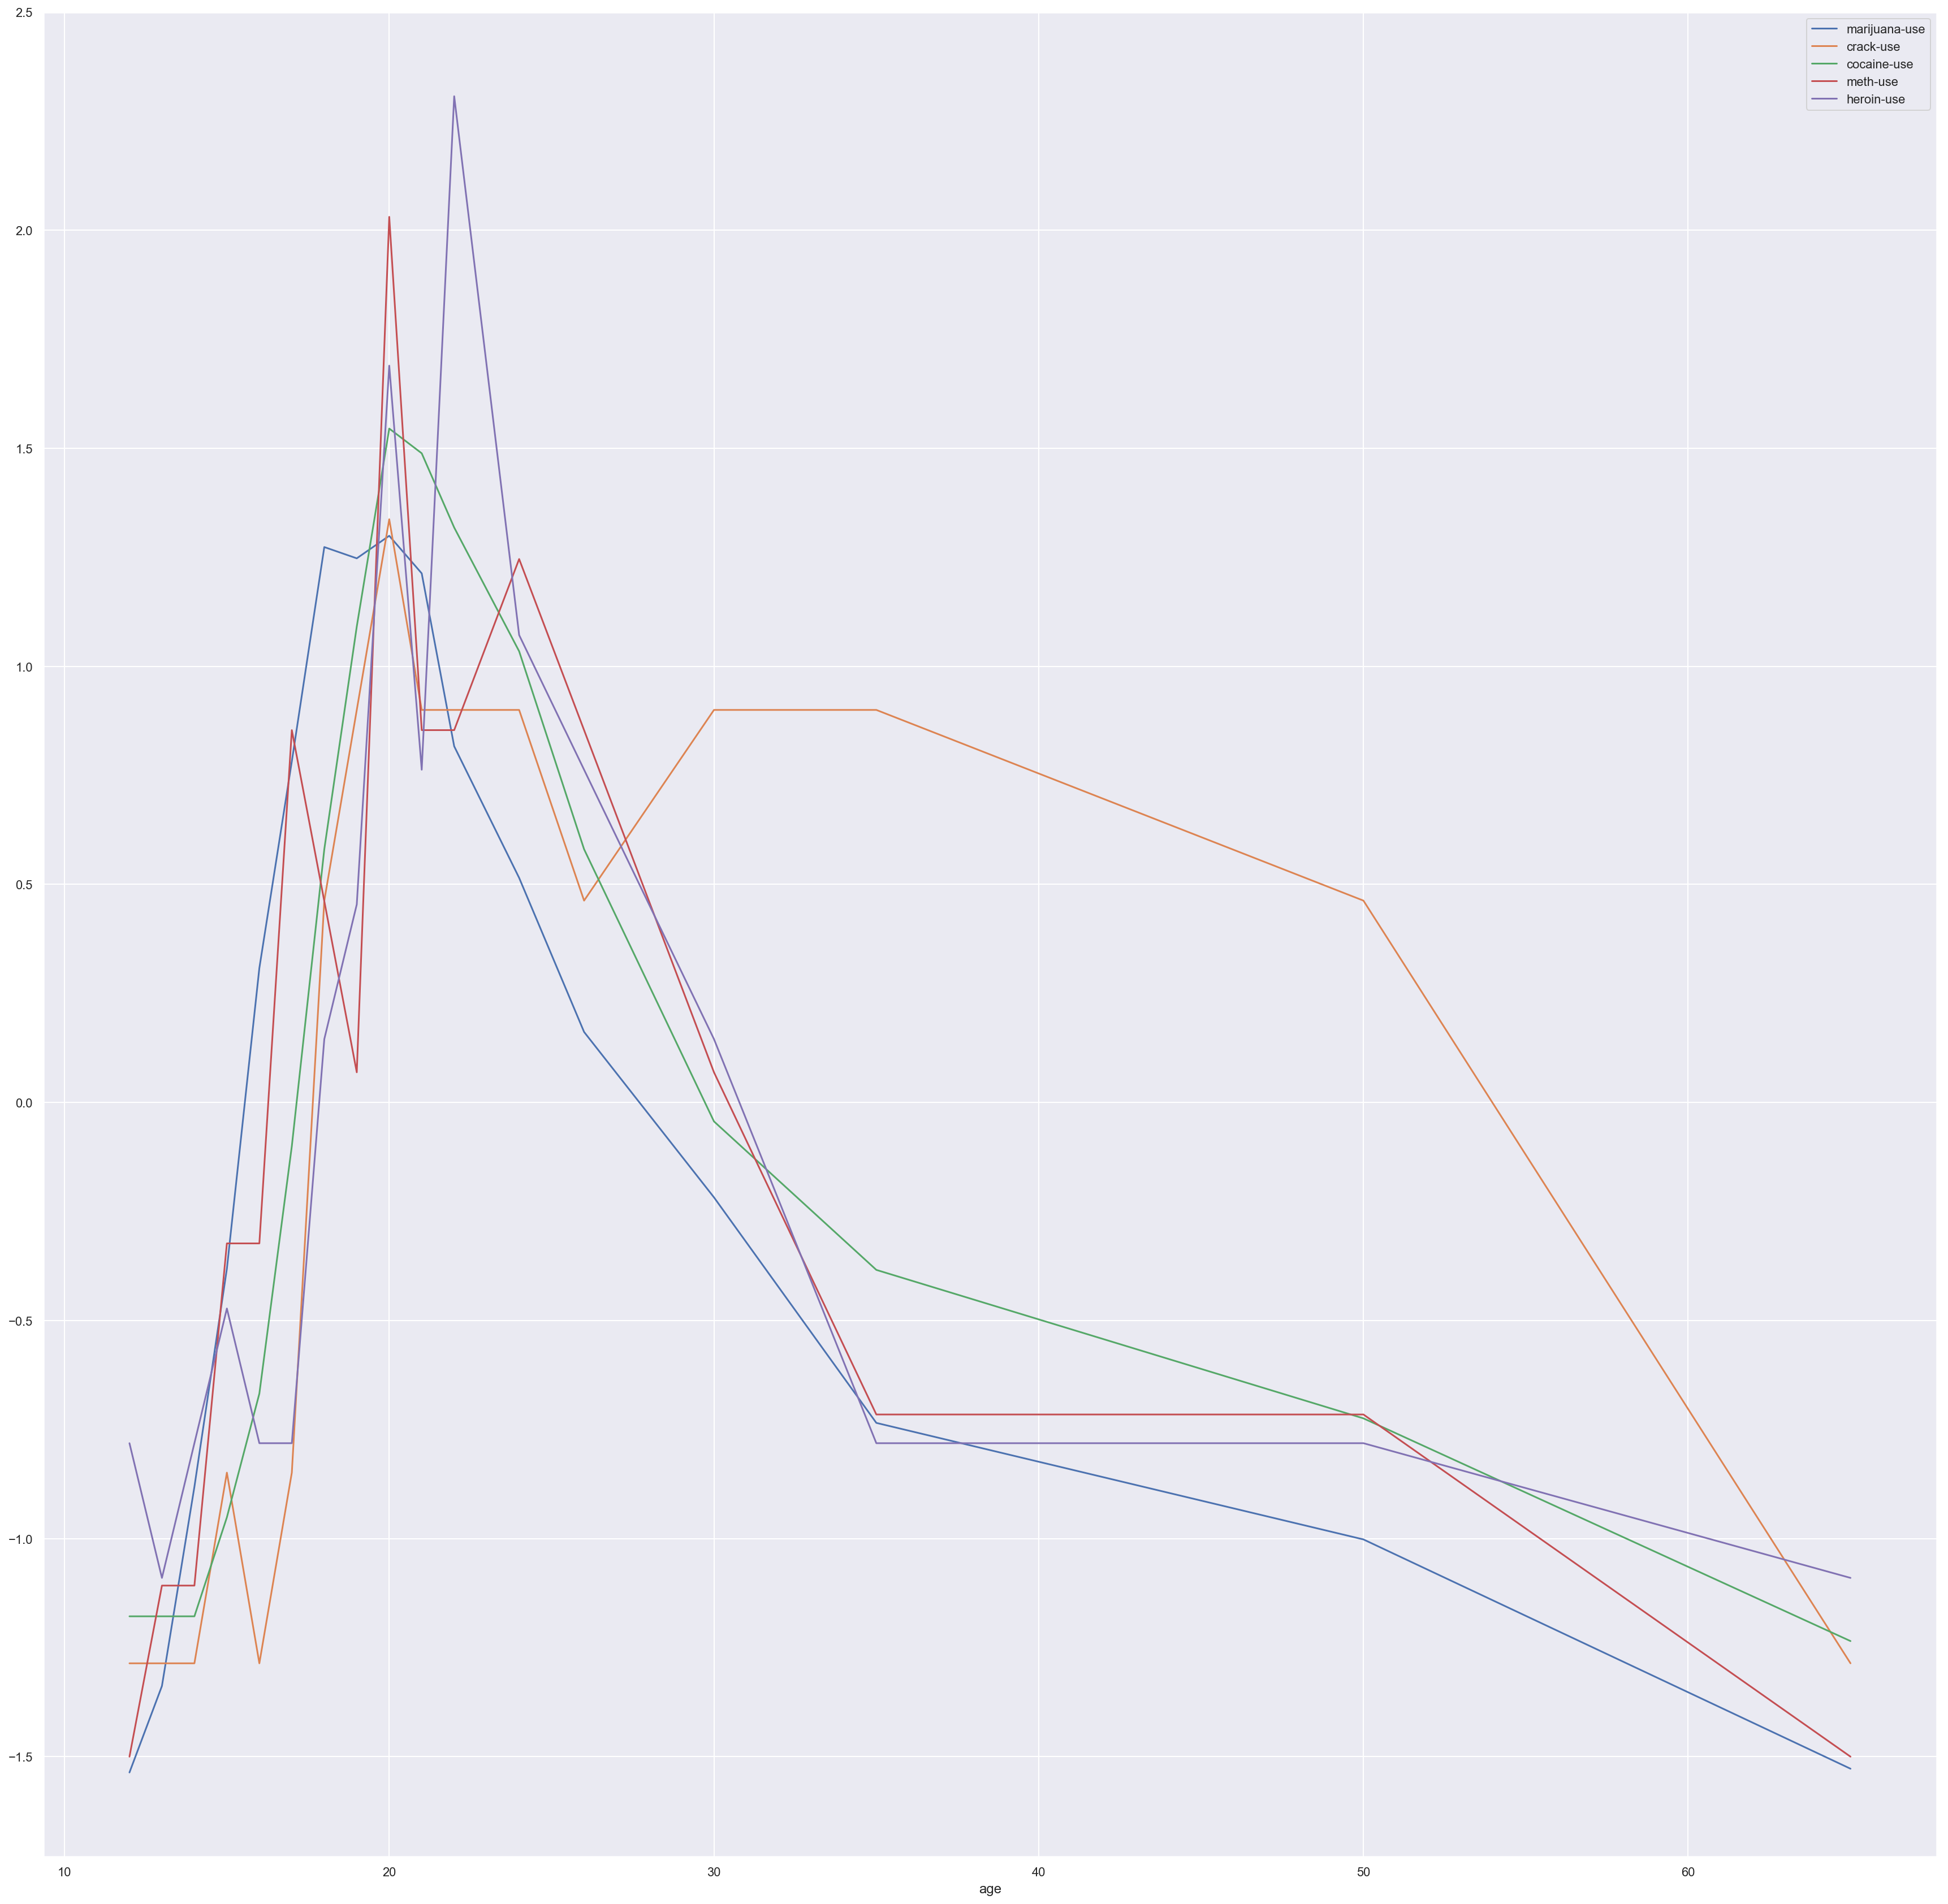

In [175]:
marijuanadf.plot.line(x='age');

#### Since drug usage starts at an early age, we should study the age only till 30 years old to see how people adopt drugs as they grew up, noting whether marijuana leads in acceleration

In [177]:
marijuana.append('age')
young = marijuanadf.loc[marijuanadf['age']<=30 , marijuana]

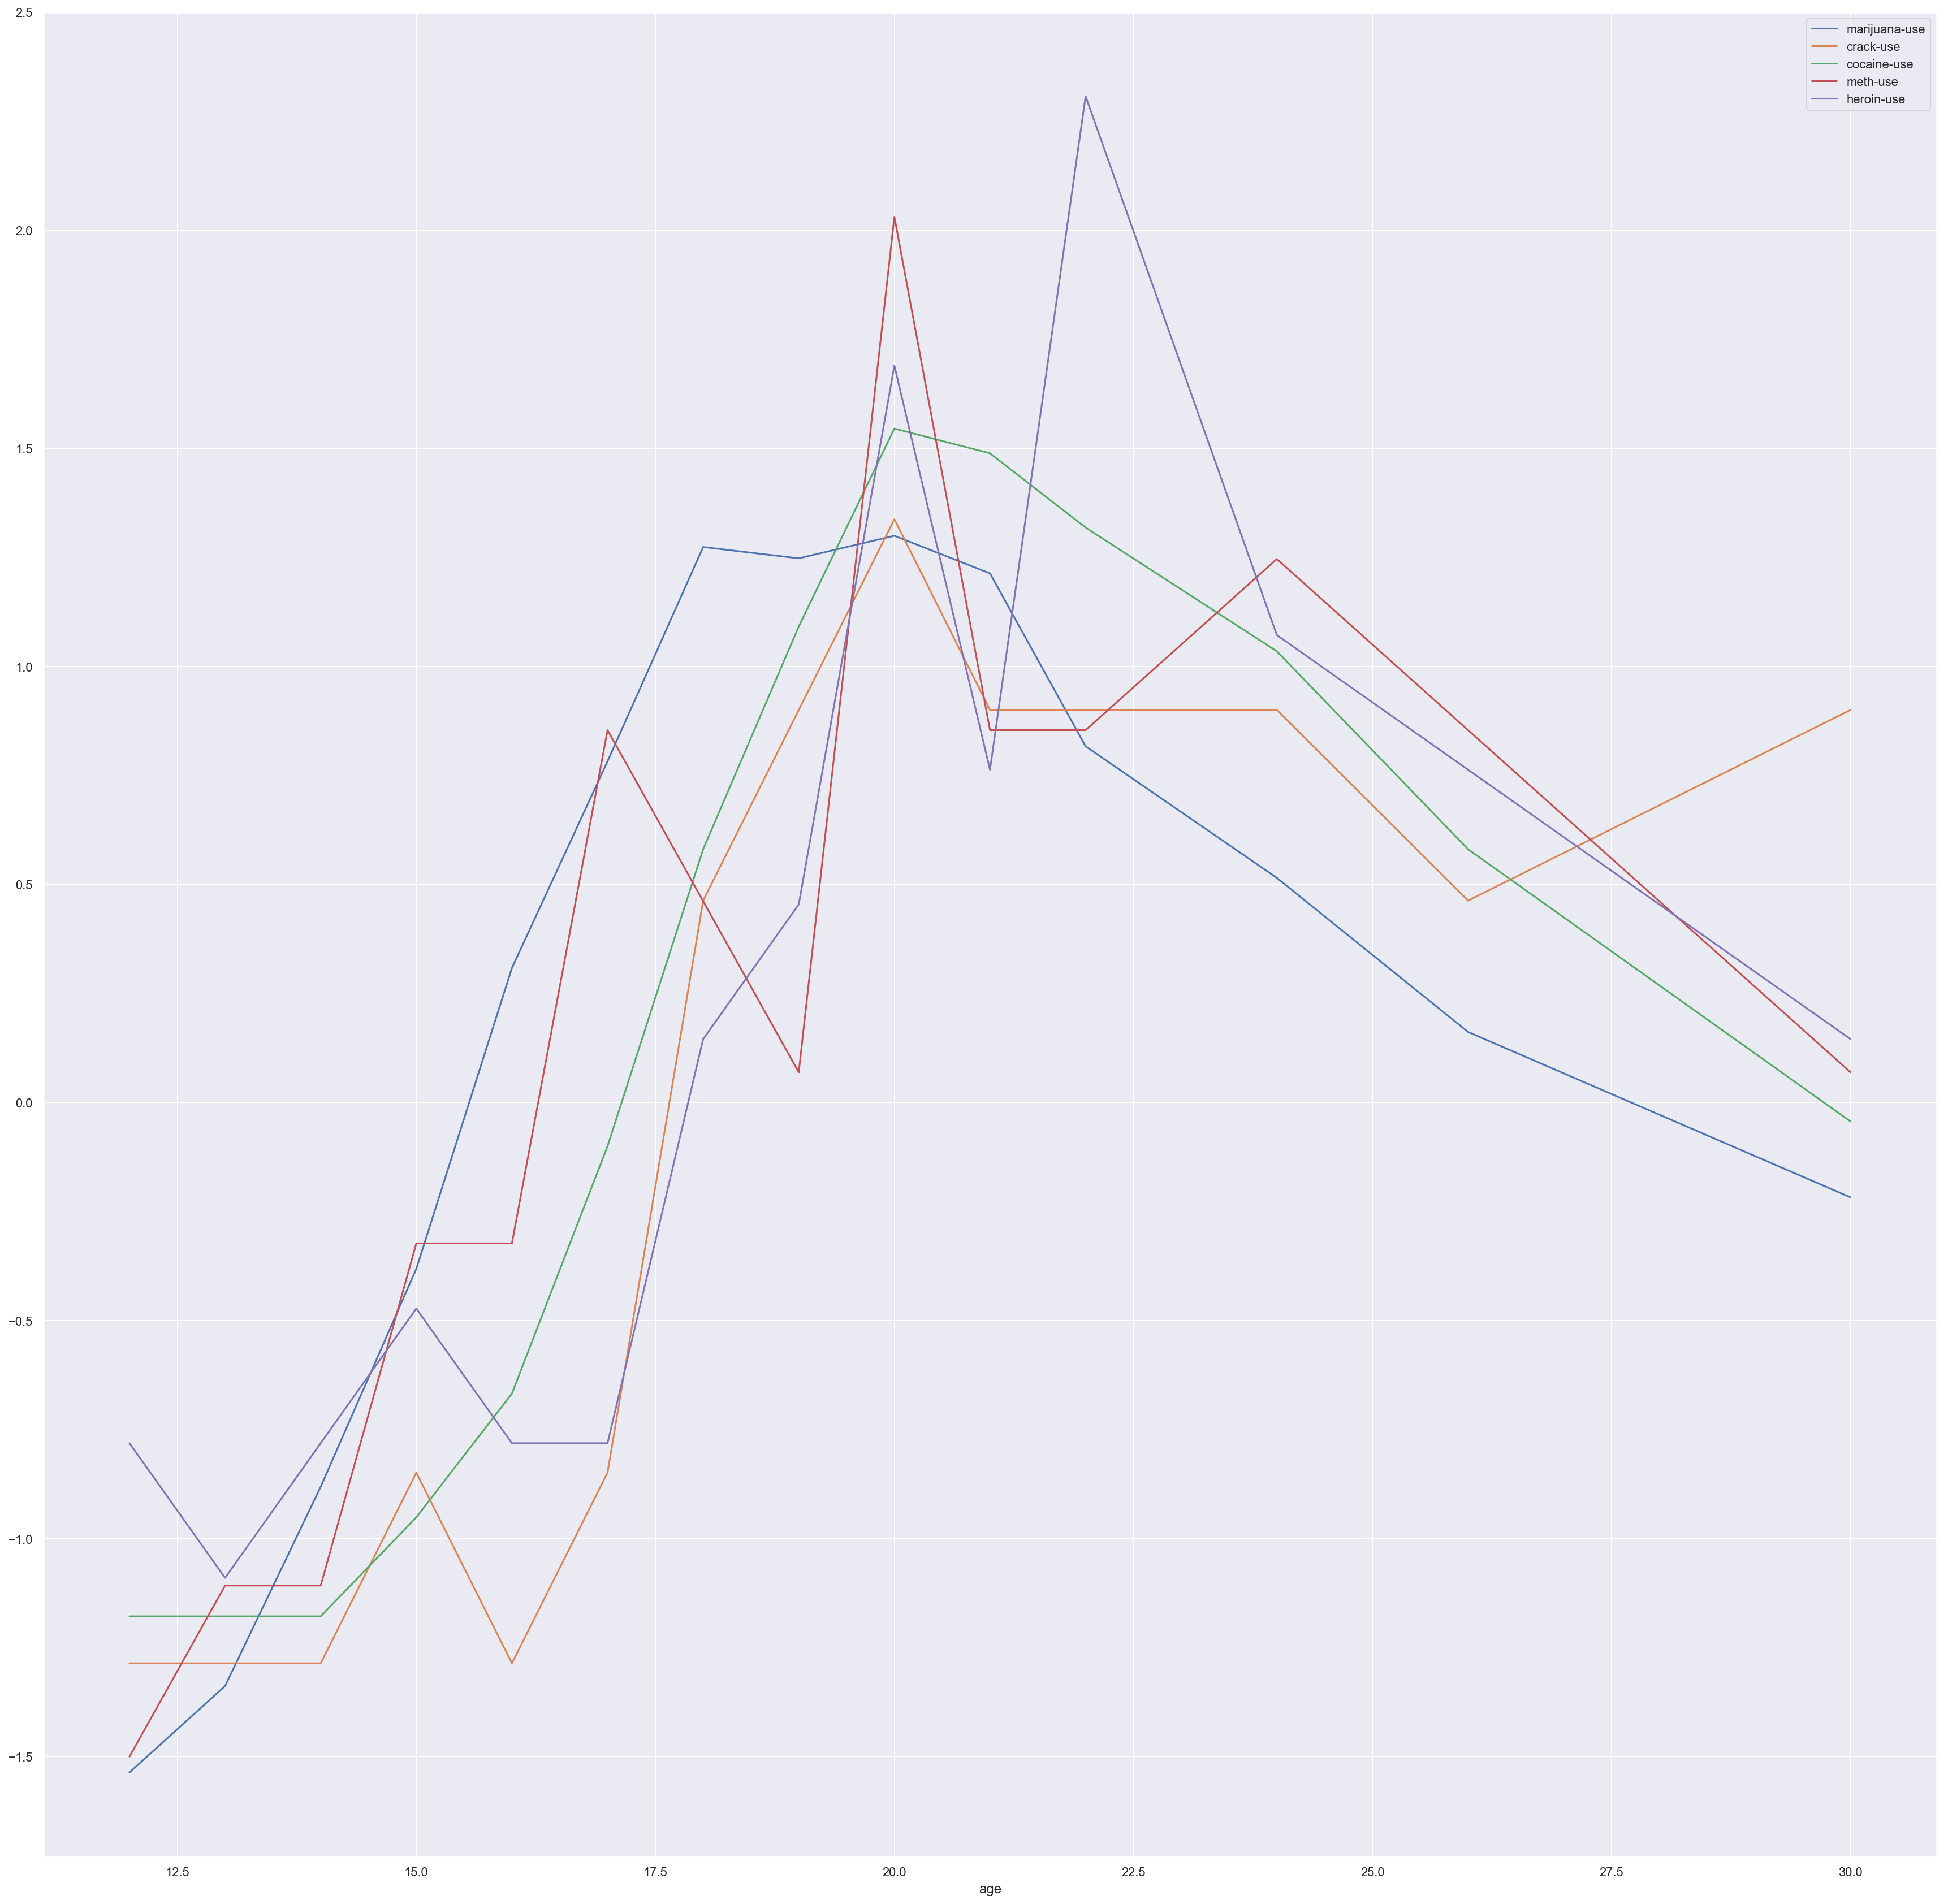

In [178]:
young.plot.line(x='age');

##### We observe that marijuana increases faster than the other drugs in the normalized graph. And when marijuana use decreases, the use of other drugs decreases after it.

#### Use Average Total Drug Use vs Marijuana Use

In [183]:
young['total'] = (young['crack-use']+young['cocaine-use']+young['meth-use']+young['heroin-use'])/4

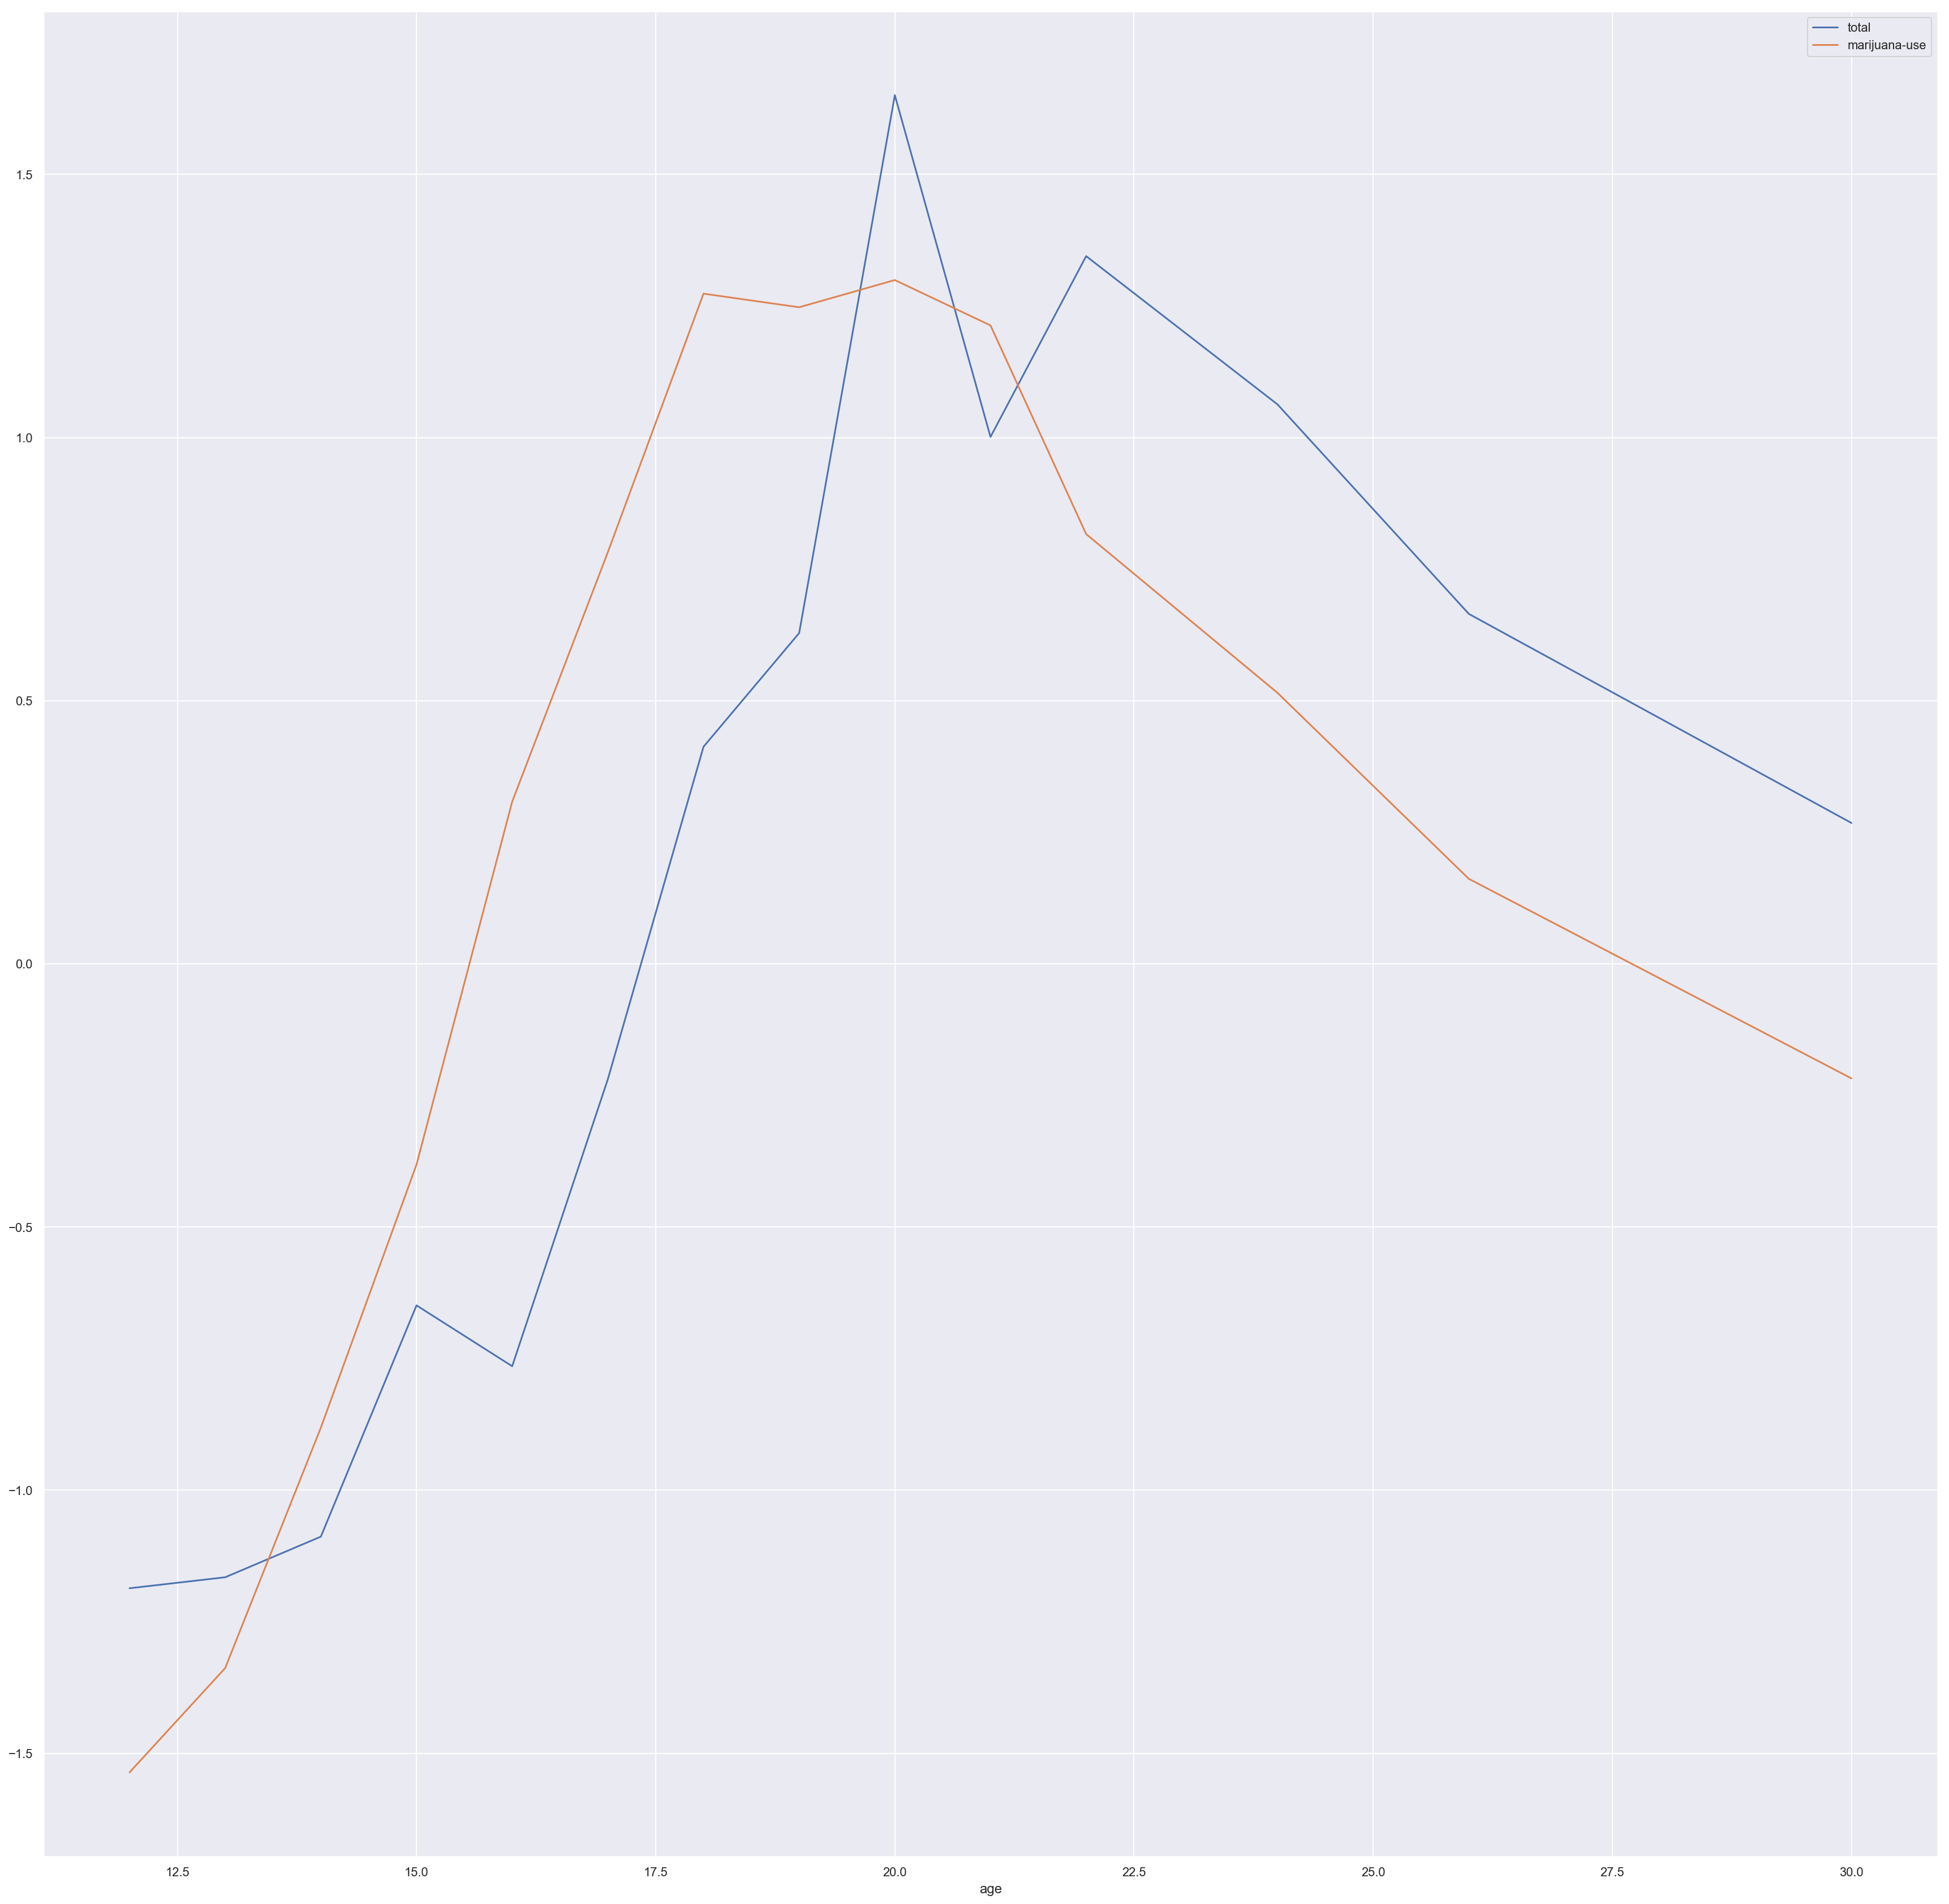

In [180]:
young.plot.line(x='age',y=['total','marijuana-use']);

#### Plot Linear Regression

slope = 0.808761131266746 total drug use
intercept = 0.11978768808576803 marijuana use


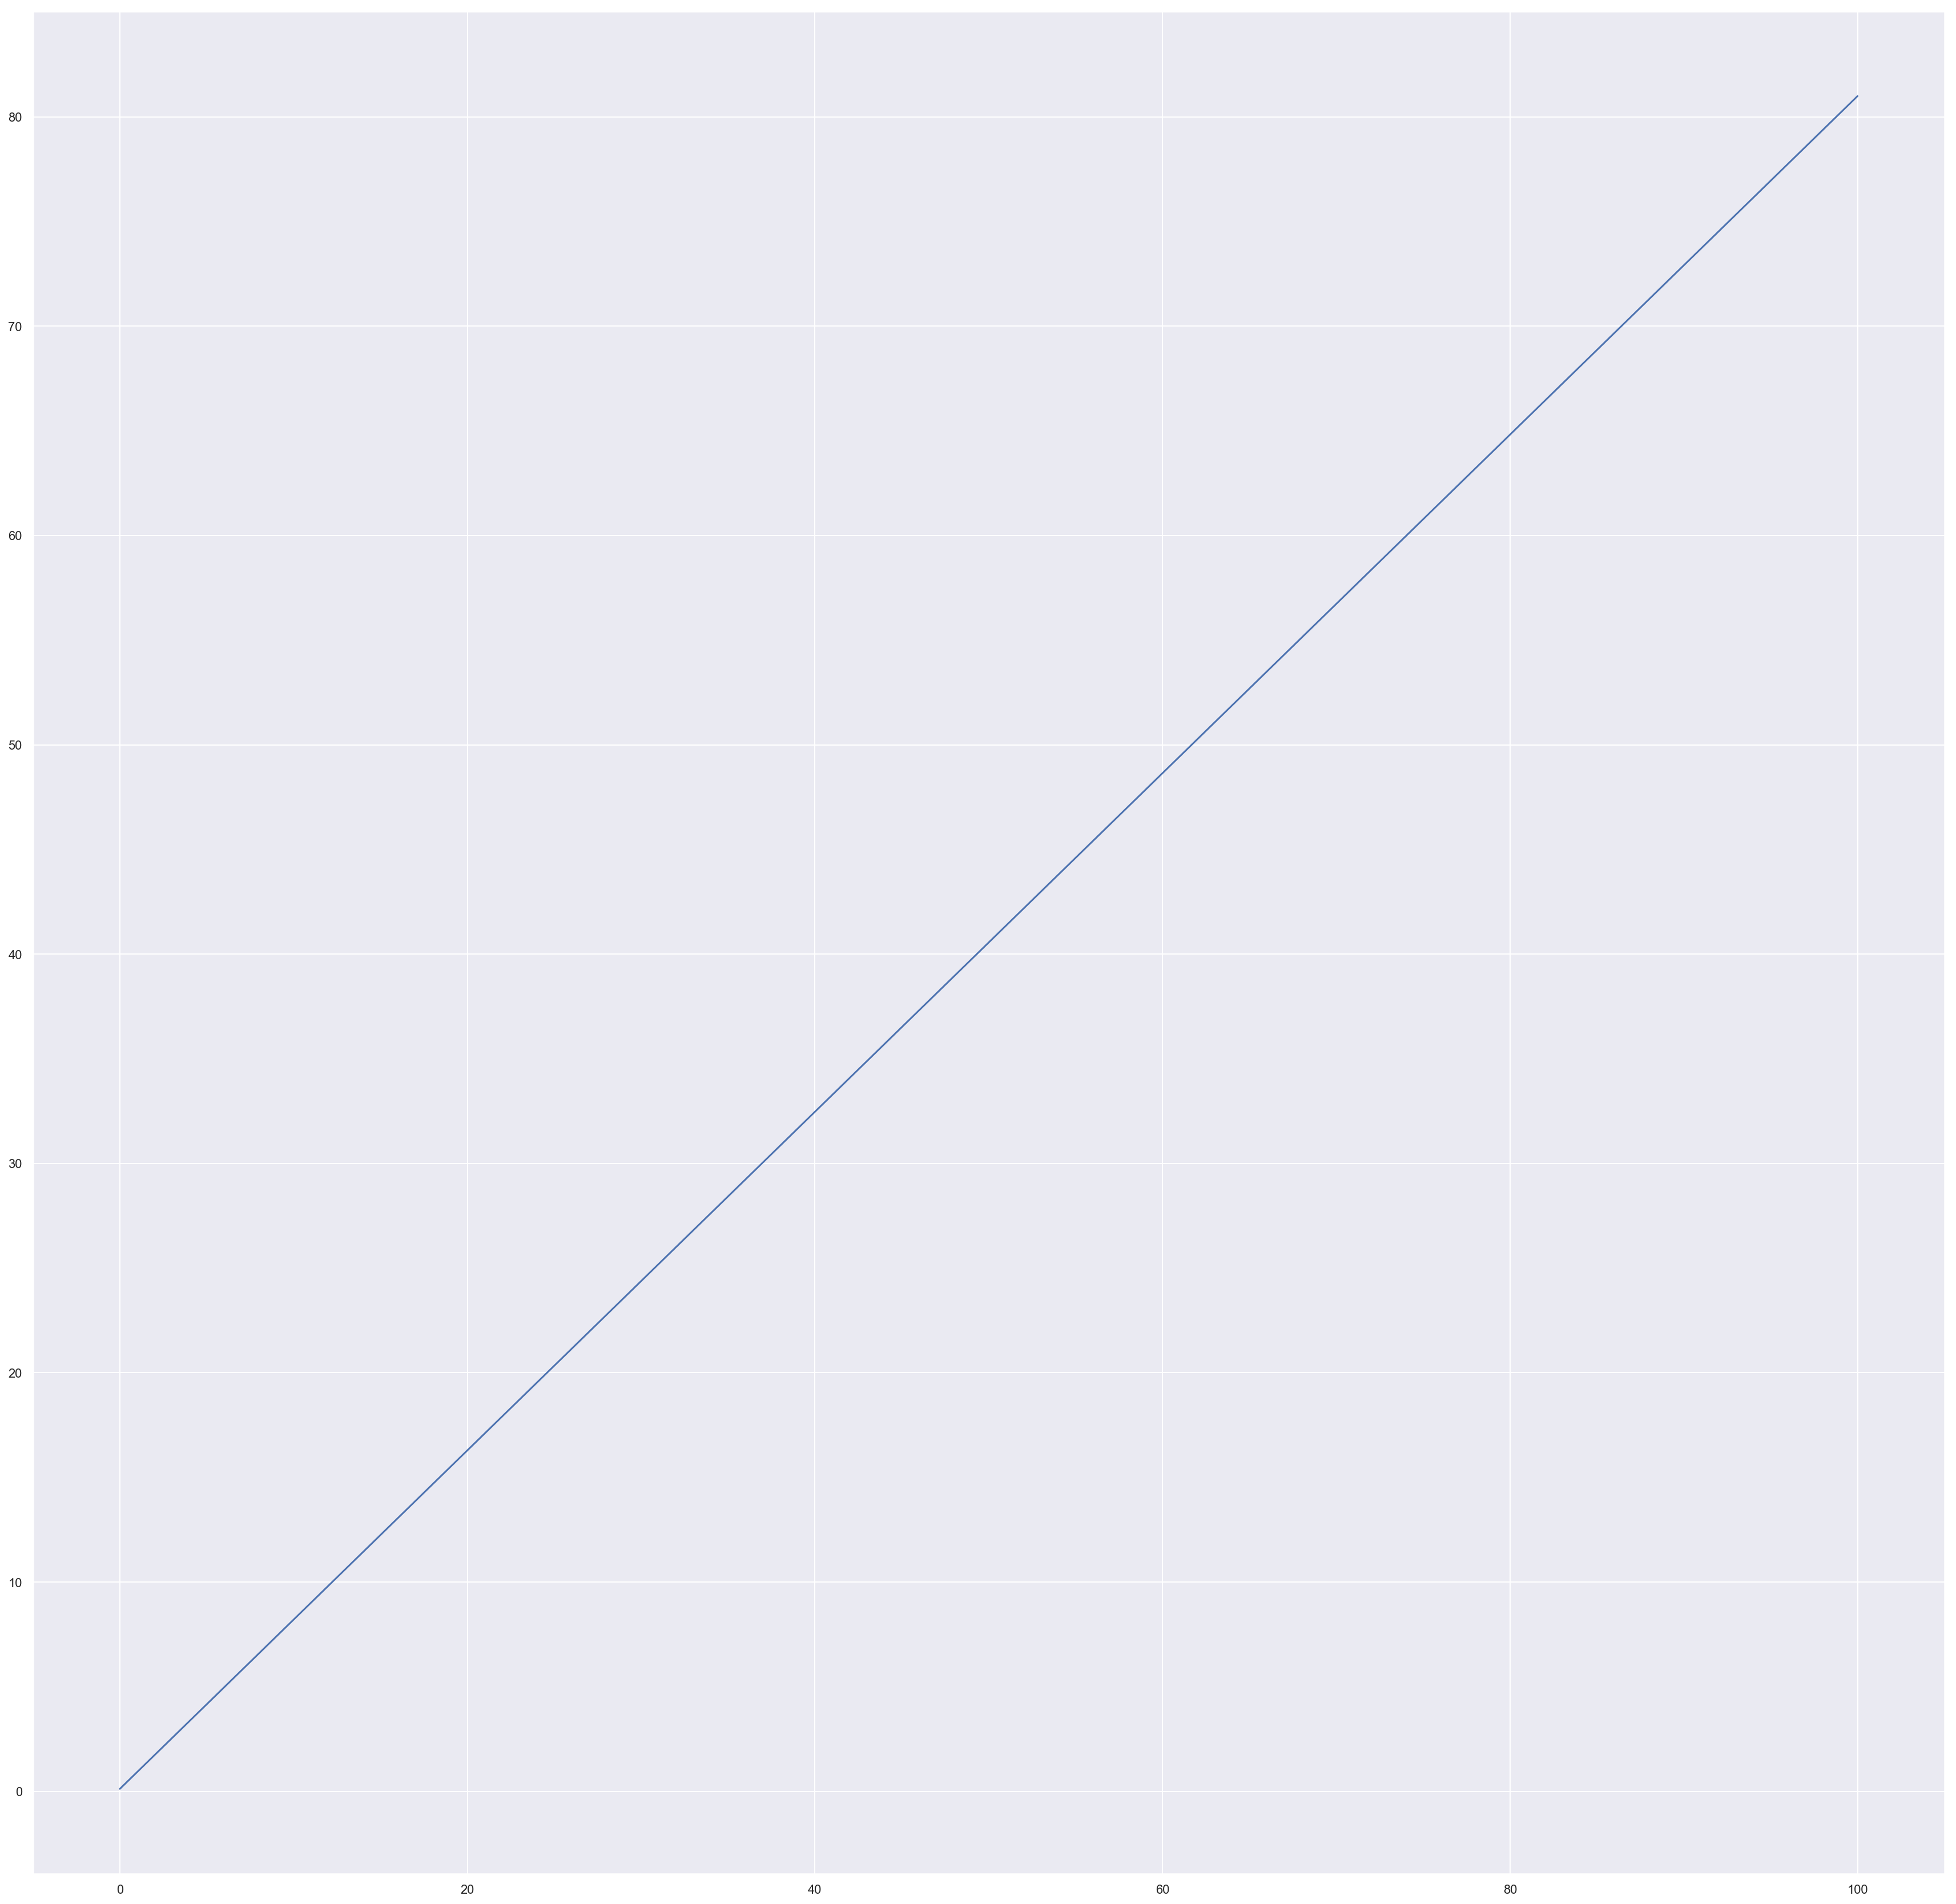

In [199]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(young['total'],young['marijuana-use'], deg =1 )

# Print the results to the screen
print('slope =', a, 'total drug use')
print('intercept =', b, 'marijuana use')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

**Report**

Our hypothesis that Marijuana is a gateway to more elicit drug use is showing positively correlate was accepted view from a younger group age to 30yrs old on the study. There is a linear relationship that trends positively based on the analysis of the data.



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.